In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import missingno as msno
from scipy.stats import norm, boxcox
from scipy.special import boxcox1p, inv_boxcox1p

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, regression,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, RFECV

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# import the data use read.csv
house = pd.read_csv('./housing.csv')

In [5]:
# create a dataframe from data
house = pd.DataFrame(house)
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
house = house.drop(['Id'],axis=1)

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [8]:
house.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [9]:
house.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

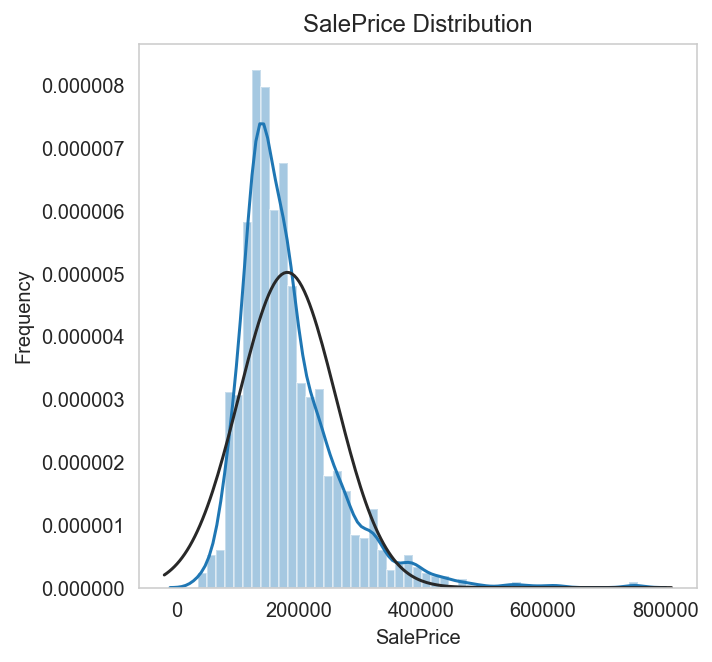

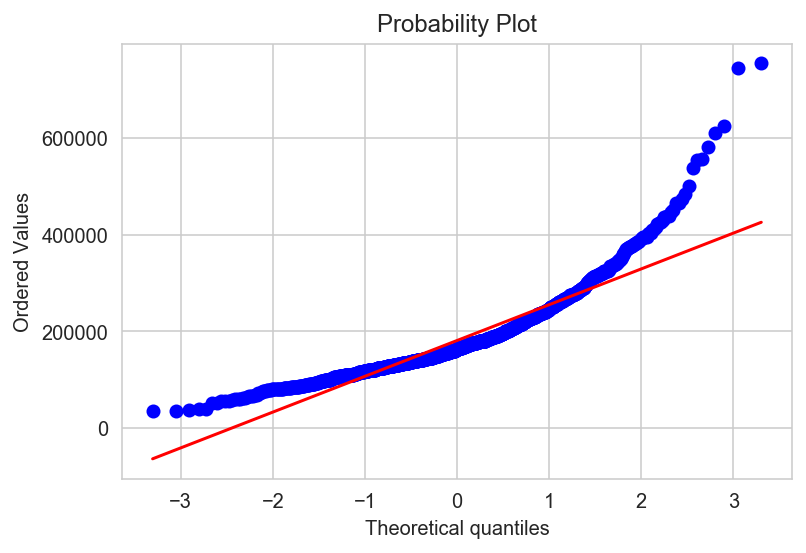

In [10]:
f, ax = plt.subplots(figsize=(5,5)) # define figure size
sns.distplot(house['SalePrice'], fit = norm) # choose displot to see distribution
ax.grid(False) # remove a grid in grapgh
ax.set(ylabel="Frequency") # set y label description
ax.set(xlabel = "SalePrice") # set x label description 
ax.set(title = "SalePrice Distribution") # set the title of graph

fig = plt.figure()
res = stats.probplot(house['SalePrice'], plot=plt)
plt.show()

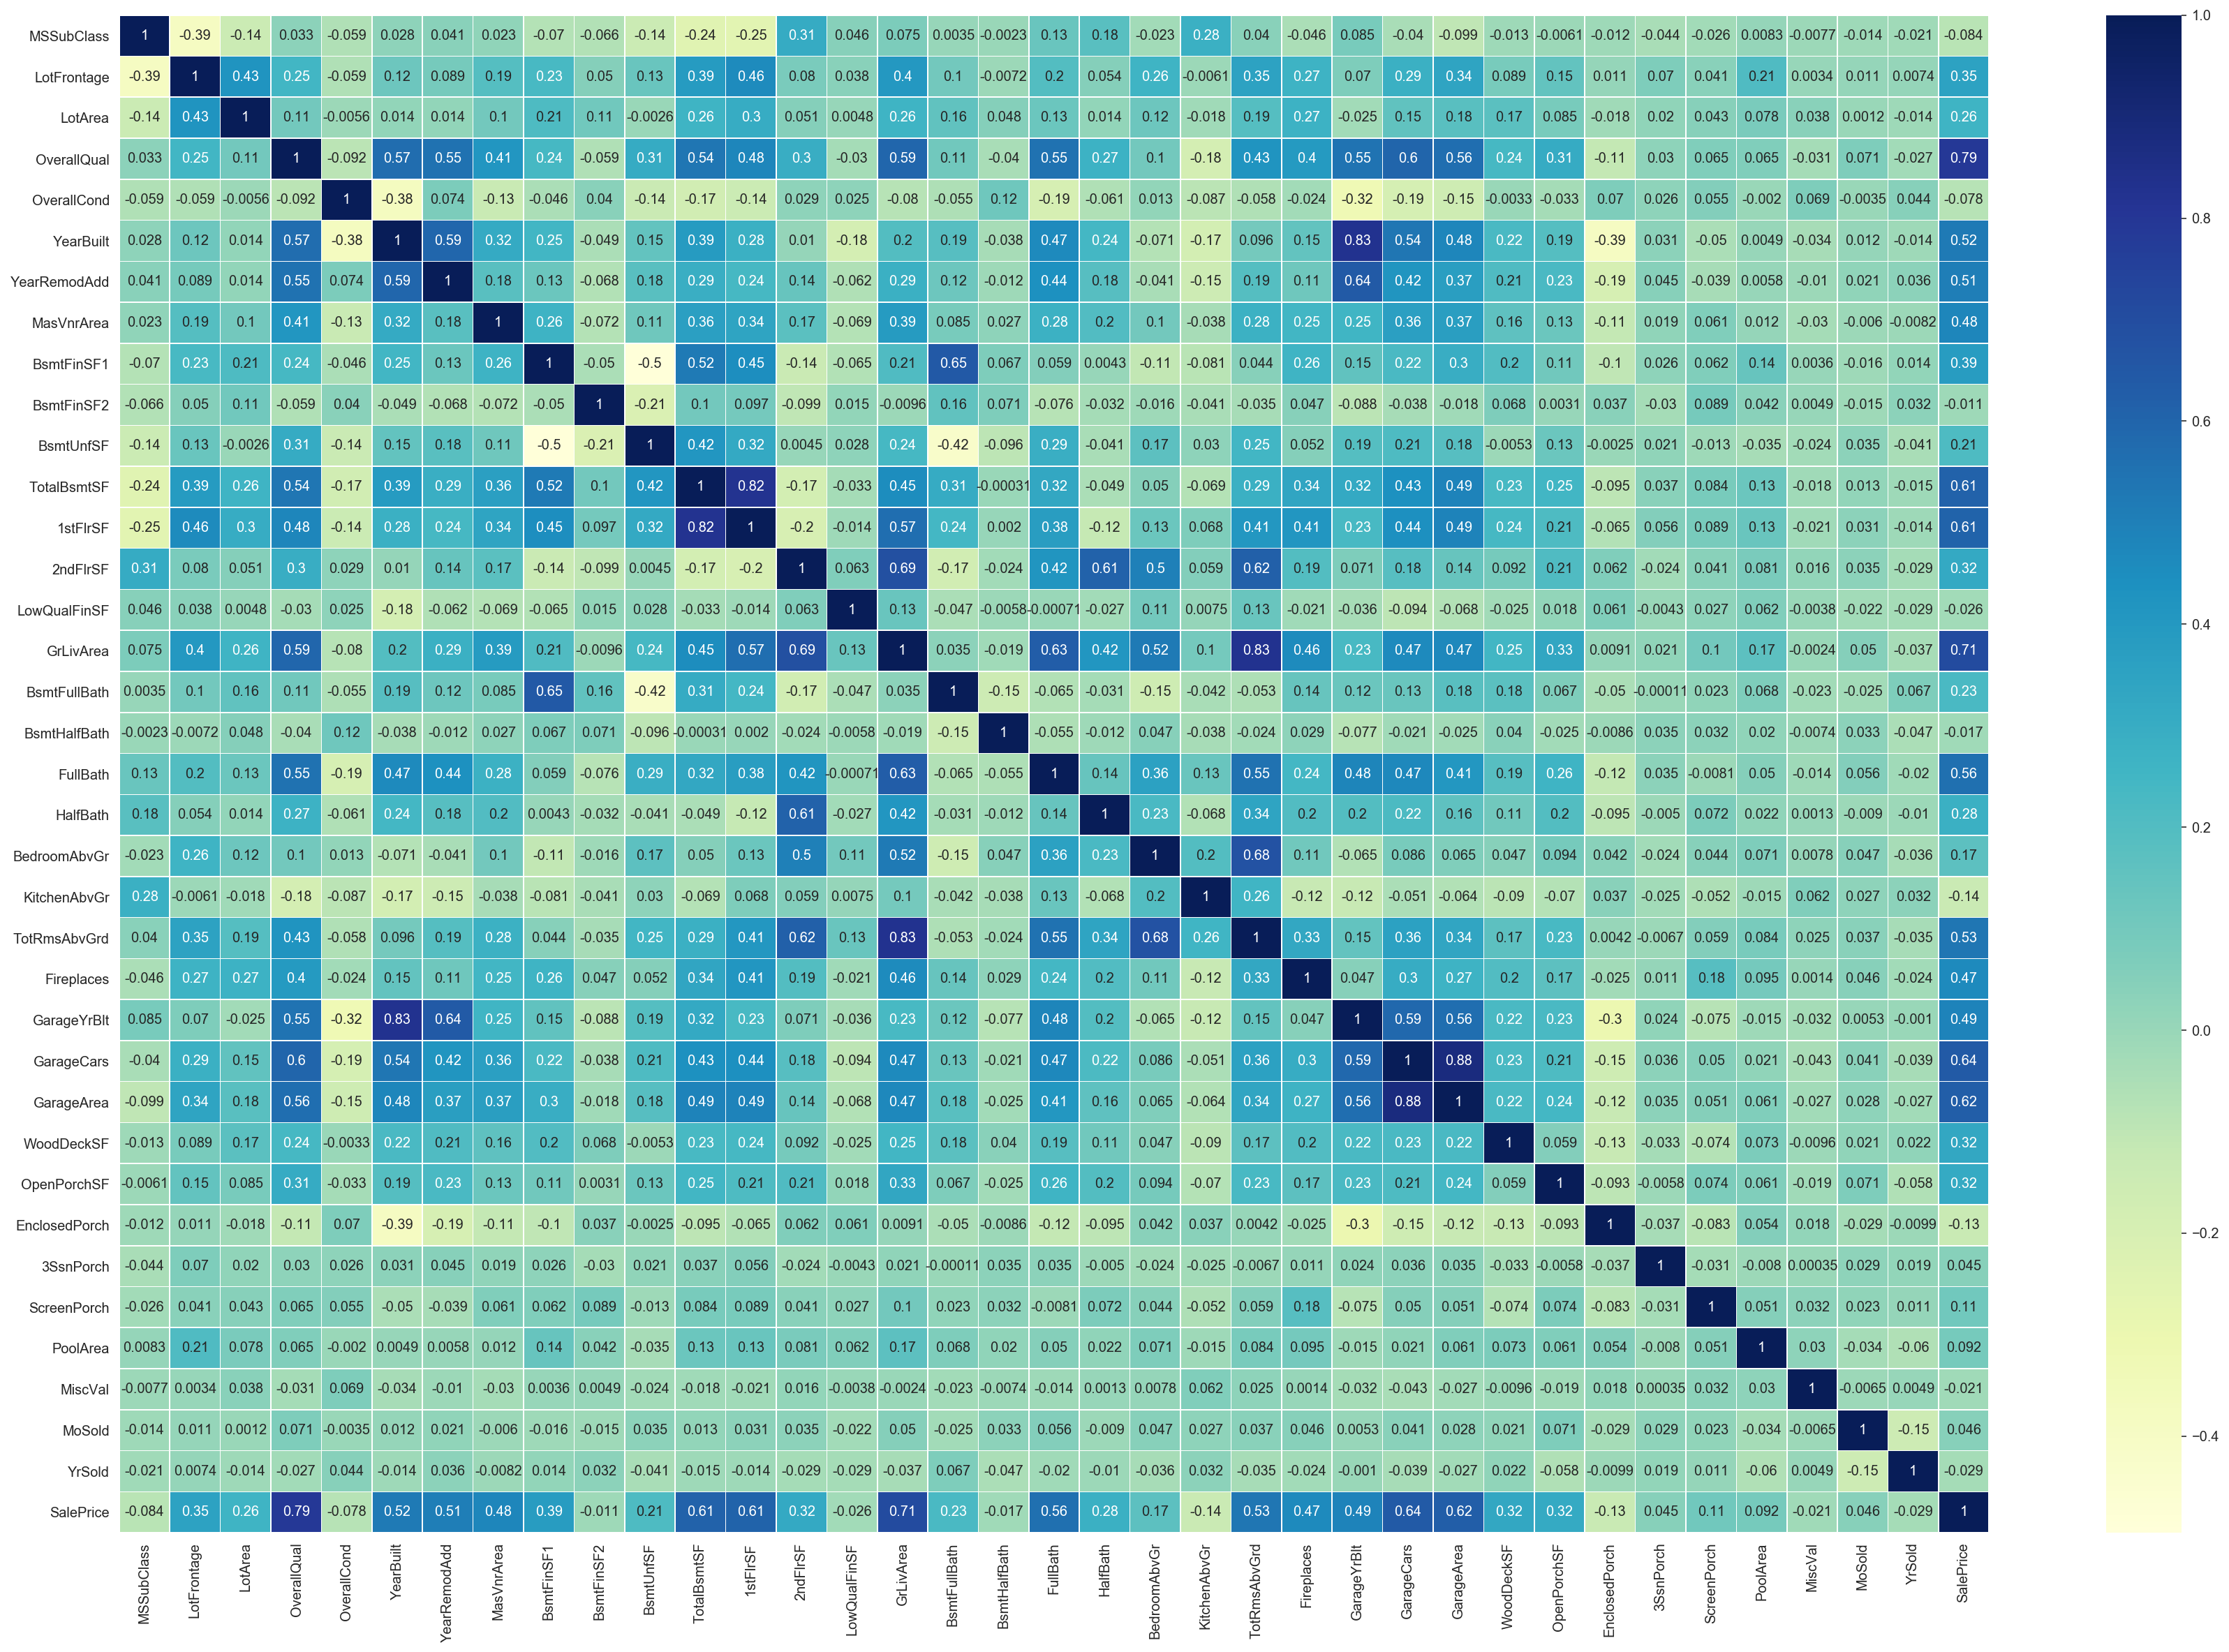

In [11]:
correlation_matrix =house.corr() #assign the correltion of each feature to correlation_matrix
f, ax = plt.subplots(figsize=(30,20)) # set a figure size
sns.heatmap(correlation_matrix, annot= True, linewidths=.3, cmap="YlGnBu") #draw a heatmap using sns.heatmap

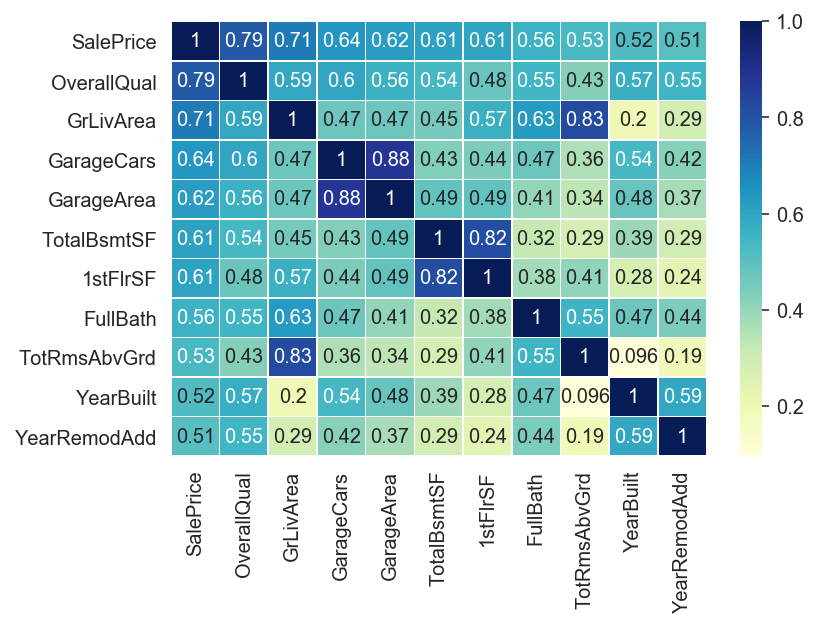

In [12]:
#saleprice correlation matrix
n = 11 #number of variables for heatmap
cols = correlation_matrix.nlargest(n,'SalePrice')['SalePrice'].index
sns.heatmap(house[cols].corr(), annot= True, linewidths=.3, cmap="YlGnBu",annot_kws={'size': 10},)

In [13]:
# sns.pairplot(house[cols])

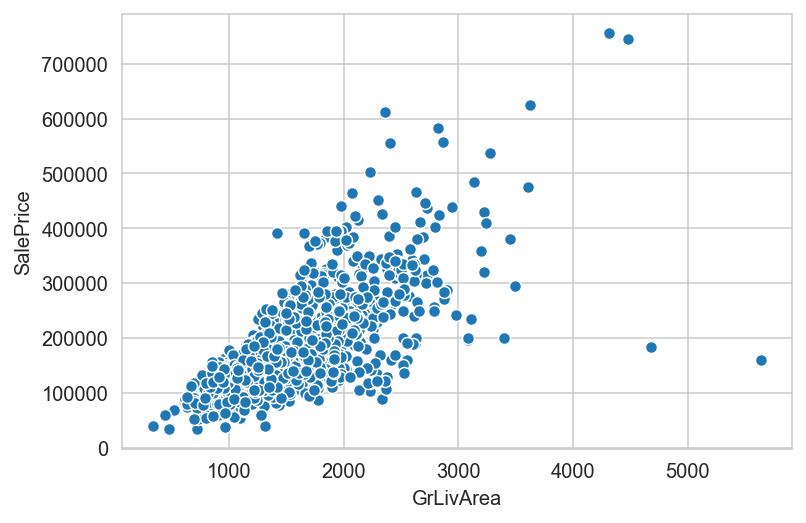

In [14]:
sns.scatterplot(house['GrLivArea'],house['SalePrice'])

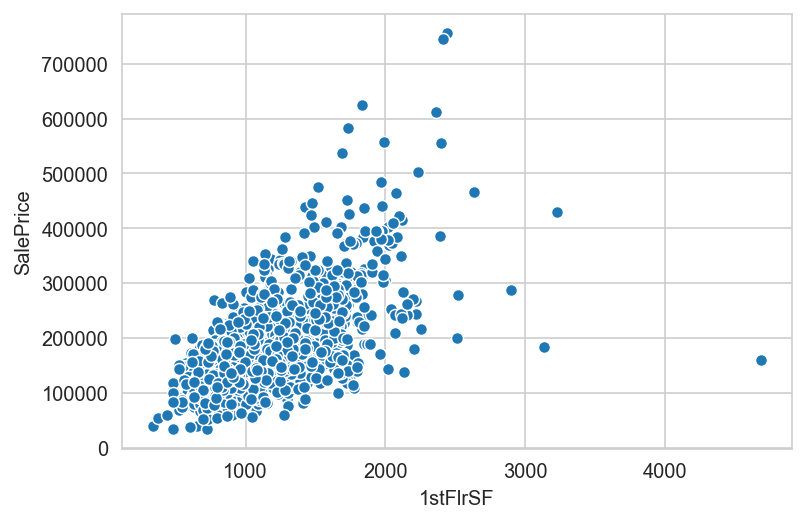

In [15]:
sns.scatterplot(house['1stFlrSF'],house['SalePrice'])

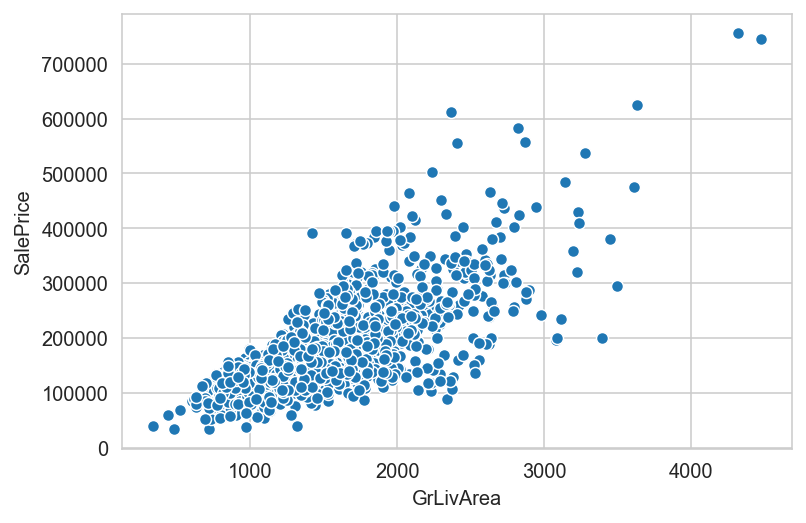

In [16]:
house = house.drop(house[(house['GrLivArea']>4000) & (house['SalePrice'] < 200000)].index) #remove a outlier from unreasonable data
sns.scatterplot(house['GrLivArea'],house['SalePrice'])

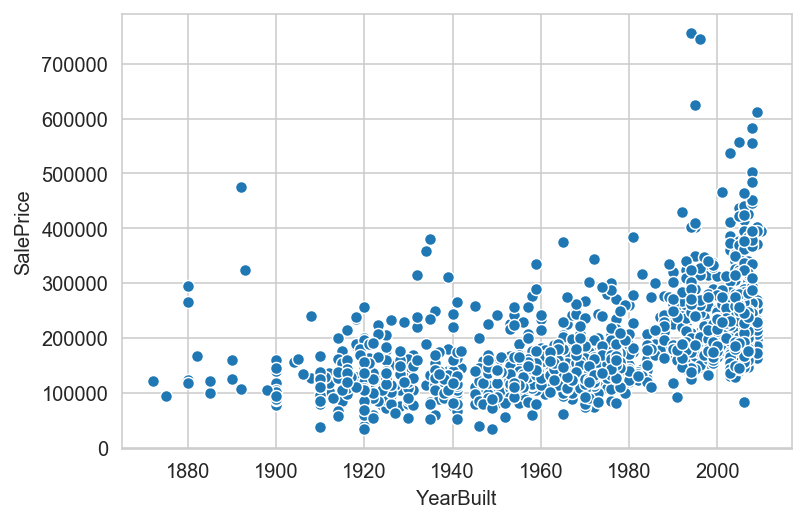

In [17]:
sns.scatterplot(house['YearBuilt'],house['SalePrice'])

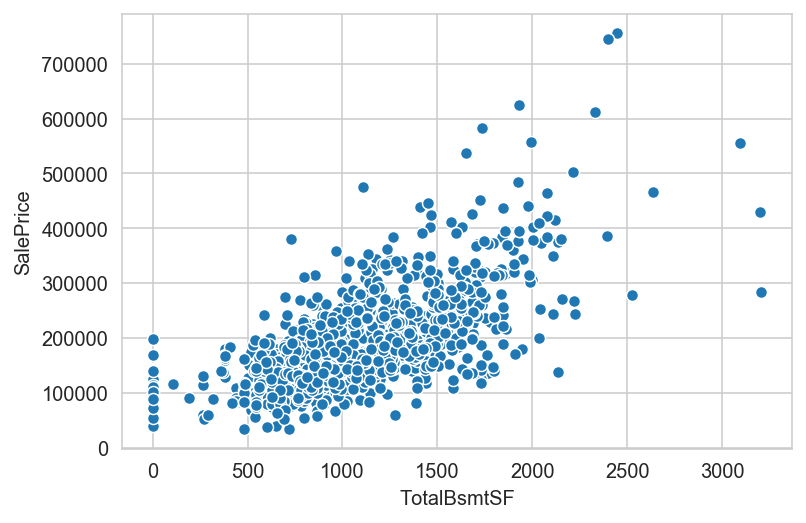

In [18]:
sns.scatterplot(house['TotalBsmtSF'],house['SalePrice'])

In [19]:
# def boxplot_outlier(data, column, x):
#     Q1 = data.loc[column==x]['SalePrice'].quantile(0.25)
#     Q3 = data.loc[column==x]['SalePrice'].quantile(0.75)
#     IQR = Q3 - Q1    #IQR is interquartile range. 
#     minimum= Q1 - 1.5 * IQR
#     maximum= Q3 + 1.5 *IQR
#     filter = (data['SalePrice'] >= minimum) & (data['SalePrice'] <= maximum)
#     data = data.loc[filter]
#     return data



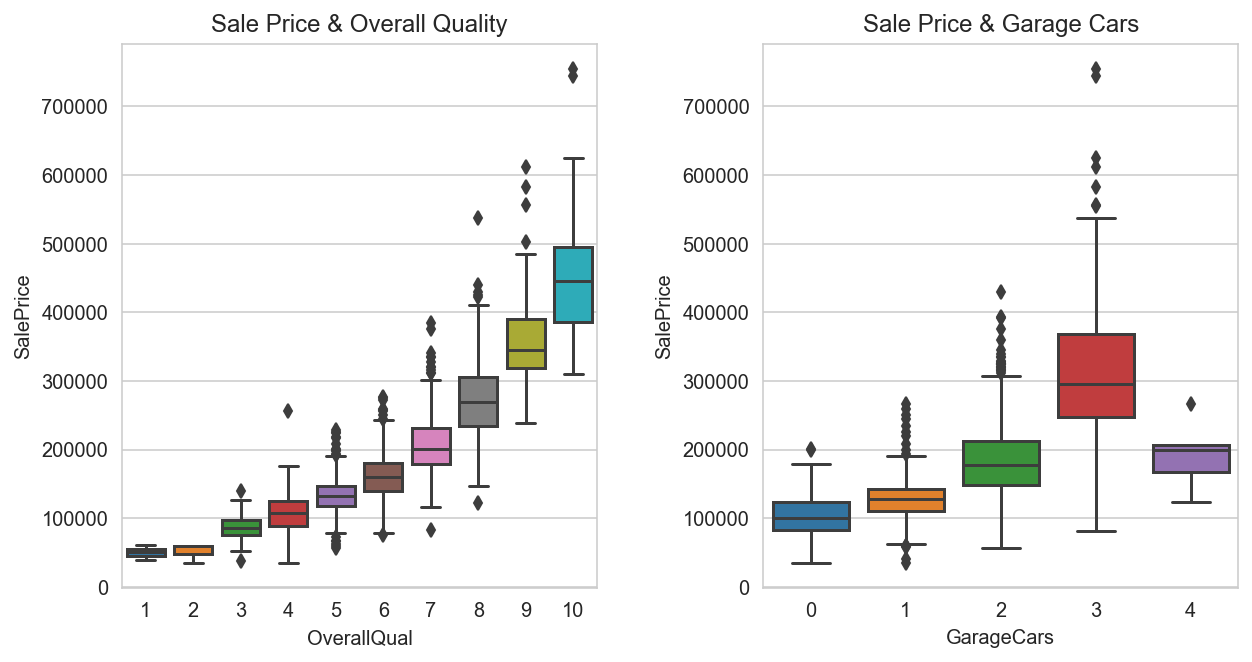

In [20]:
f, ax=plt.subplots(figsize=(10,5))
plt.subplot(1,2,2)
sns.boxplot(house['GarageCars'],house['SalePrice'])
plt.title(label="Sale Price & Garage Cars")
plt.subplot(1,2,1)
sns.boxplot(house['OverallQual'],house['SalePrice'])
plt.title(label="Sale Price & Overall Quality")
plt.subplots_adjust(wspace=0.35)

In [21]:
for i in sorted(house['GarageCars'].unique()):
    Q1 = house.loc[house['GarageCars']==i]['SalePrice'].quantile(0.25)
    Q3 = house.loc[house['GarageCars']==i]['SalePrice'].quantile(0.75)
    IQR = Q3 - Q1
    minimum= Q1 - 1.5 * IQR
    maximum= Q3 + 1.5 *IQR
    #print(Q1,Q3,IQR,minimum,maximum)
    house.drop(house.loc[(house['GarageCars']==i) & ((house['SalePrice']< minimum) | (house['SalePrice']> maximum))].index,inplace= True)
    print(house.shape)


(1456, 80)
(1441, 80)
(1420, 80)
(1413, 80)
(1412, 80)


In [22]:
for i in sorted(house['OverallQual'].unique()):
    Q1 = house.loc[house['OverallQual']==i]['SalePrice'].quantile(0.25)
    Q3 = house.loc[house['OverallQual']==i]['SalePrice'].quantile(0.75)
    IQR = Q3 - Q1
    minimum= Q1 - 1.5 * IQR
    maximum= Q3 + 1.5 *IQR
    #print(Q1,Q3,IQR,minimum,maximum)
    house.drop(house.loc[(house['OverallQual']==i) & ((house['SalePrice']< minimum) | (house['SalePrice']> maximum))].index,inplace= True)
    print(house.shape)




(1412, 80)
(1412, 80)
(1410, 80)
(1409, 80)
(1393, 80)
(1384, 80)
(1377, 80)
(1367, 80)
(1365, 80)
(1365, 80)


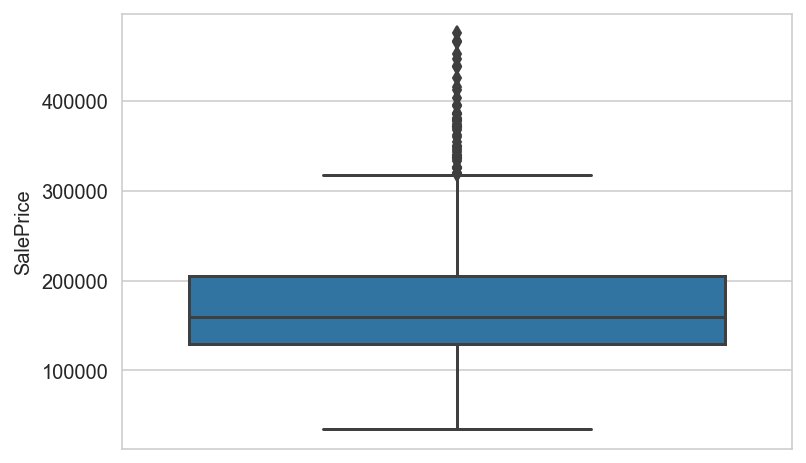

In [23]:
sns.boxplot(y=house['SalePrice'])

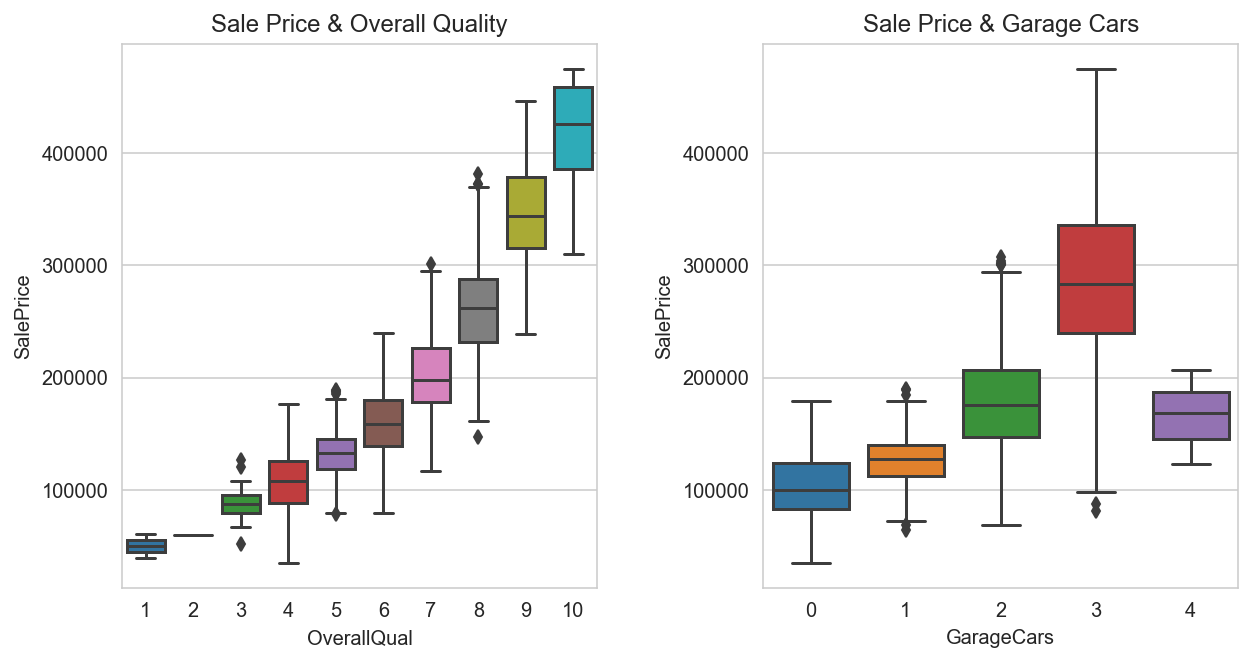

In [24]:
f, ax=plt.subplots(figsize=(10,5))
plt.subplot(1,2,2)
sns.boxplot(house['GarageCars'],house['SalePrice'])
plt.title(label="Sale Price & Garage Cars")
plt.subplot(1,2,1)
sns.boxplot(house['OverallQual'],house['SalePrice'])
plt.title(label="Sale Price & Overall Quality")
plt.subplots_adjust(wspace=0.35)

## Missing value

In this section, missing values were handled by data type and evaluation of each feature.

|features|missing percentage|desceiption|Impute|meaning|
|---|---|---|---|---|
|PoolQC        |  99.520548|Pool quality| None | No pool|
|MiscFeature   |  96.301370|Miscellaneous feature not covered in other categories|  None | No Miscellaneous feature |
|Alley         |  93.767123|Type of alley access to property|  None |No alley access|
|Fence         |  80.753425|Fence quality |  None | No fence|
|FireplaceQu   |  47.260274|Fireplace quality|  None | No Fireplace|
|LotFrontage   |  17.739726|Linear feet of street connected to property|  0 | No Street or the property is next to the street|
|GarageCond    |   5.547945|Garage condition| None | No Garage|
|GarageType    |   5.547945|Garage location| None | No Garage|
|GarageYrBlt   |   5.547945|Year garage was built| None | Unknown year built or no Garage|
|GarageFinish  |   5.547945|Interior finish of the garage| None | No Garage|
|GarageQual    |   5.547945|Garage quality| None | No Garage|
|BsmtExposure  |   2.602740|Refers to walkout or garden level walls|  None |No Basement|
|BsmtFinType2  |   2.602740|Rating of basement finished area (if multiple types)|  None |No Basement|
|BsmtFinType1  |   2.534247|Rating of basement finished area|  None |No Basement|
|BsmtCond      |   2.534247|the general condition of the basement|  None |No Basement|
|BsmtQual      |   2.534247|the height of the basement|  None | No Basement|
|MasVnrArea    |   0.547945|Masonry veneer area in square feet|  0 | No Masonry veneer|
|MasVnrType    |   0.547945|Masonry veneer type|  None | No Masonry veneer|
|Electrical    |   0.068493|Electrical system |  SBrkr| Standard Circuit Breakers & Romex|

There are 19 features that contains missing value. the percentage is shown in the table above. First of all, the PoolQC, MiscFeature, Alley and Fence have more than 80 percent of missing value. I will look at these features in detail. Then, I decide to use description of data and data characteristic to define the missing value of each feature.
1. If the feature is categorical data, I'll impute it as None which mean there do not have these feature in the property.
2. If the feature is numeric data, I'll impute it with 0 as there do not have these features in the property.
3. If the feature is mandatory for property, I'll impute it with statistical value.

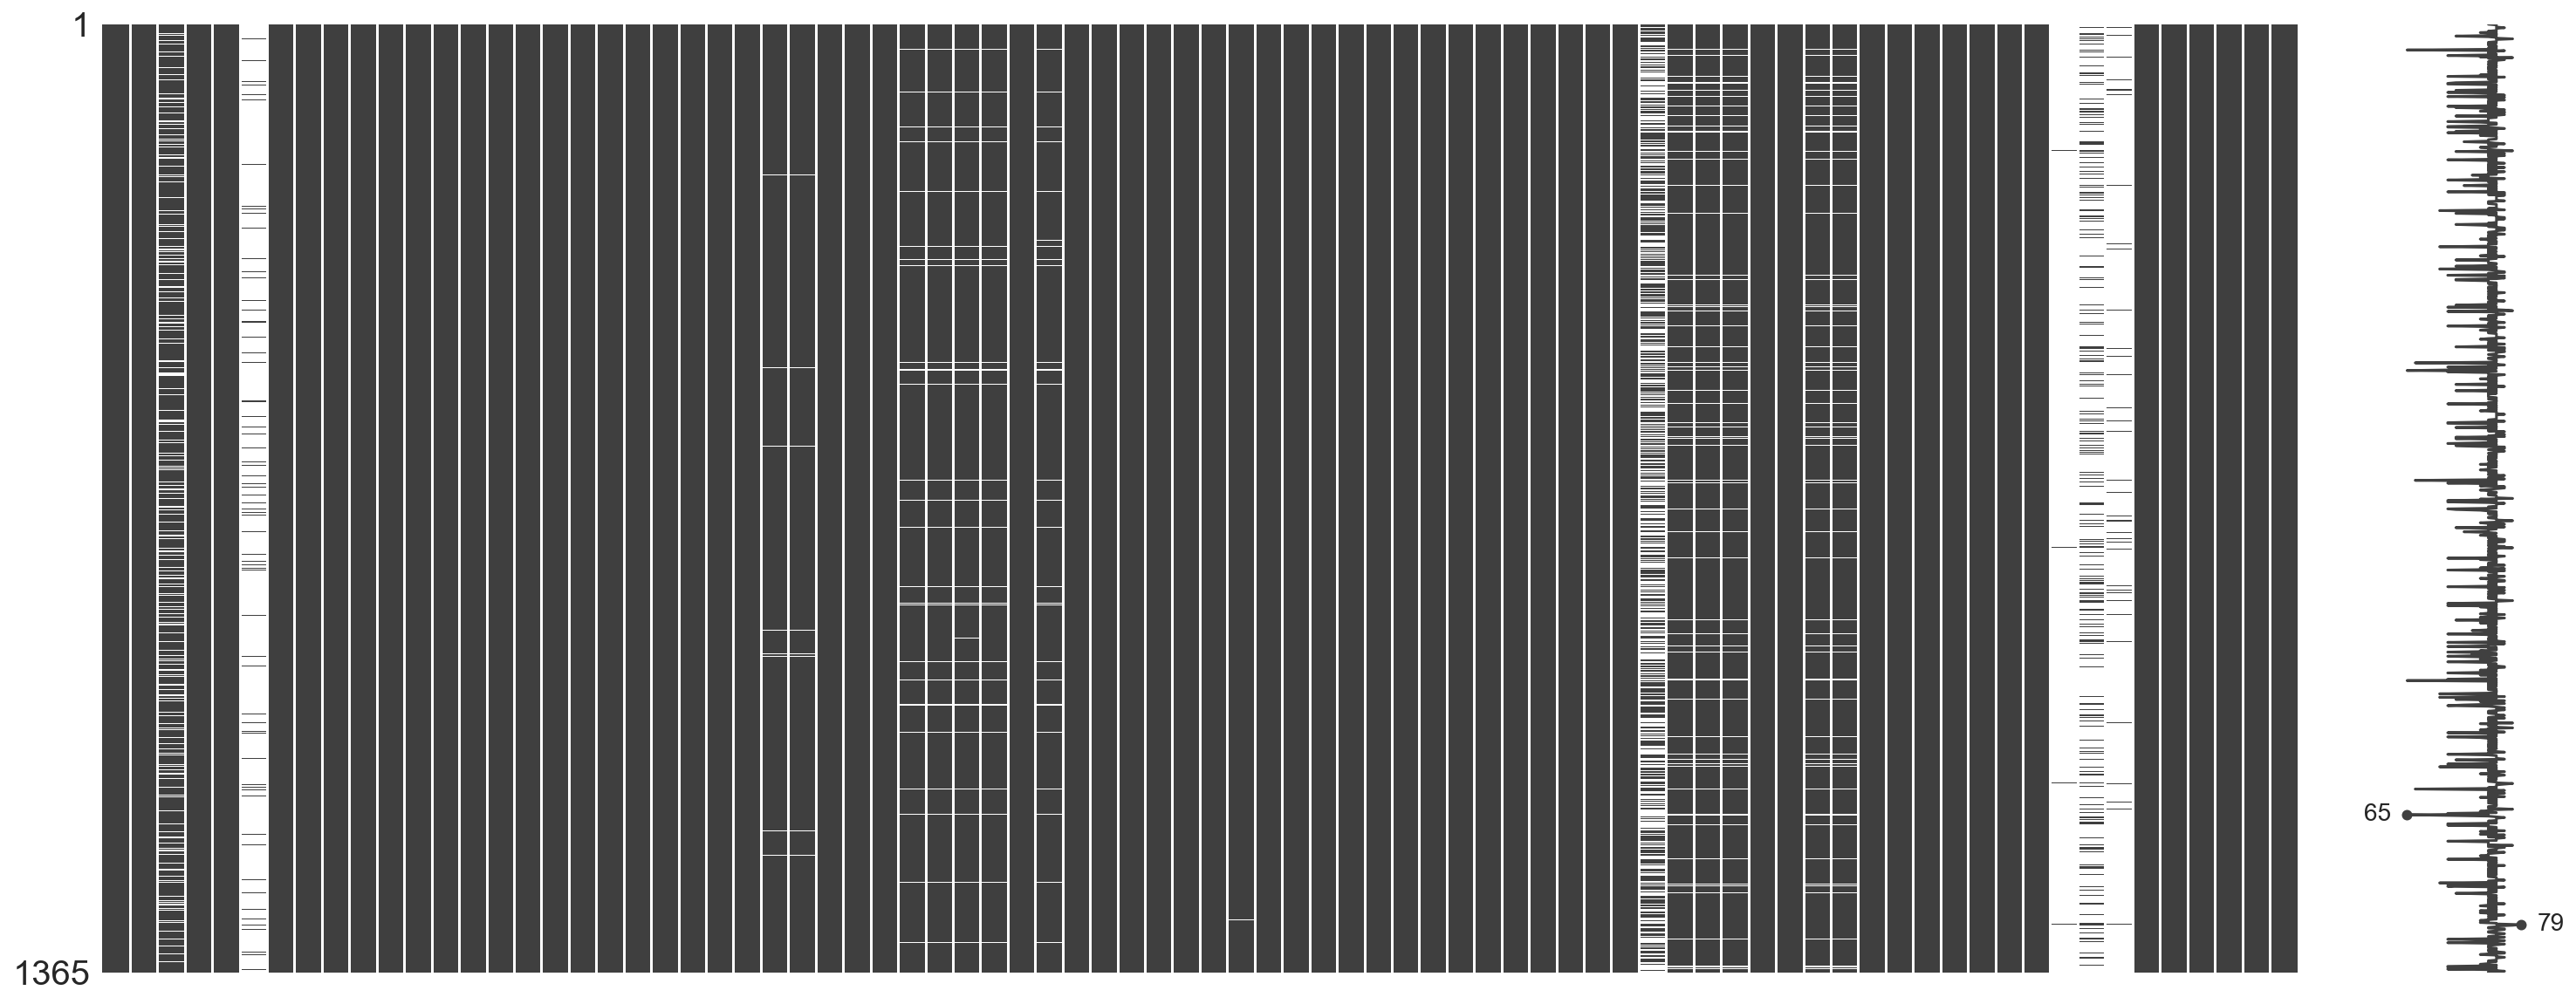

In [25]:

# there is a lot of missing value as see from the graph below
import missingno as msno
msno.matrix(house)

In [26]:
# find a a percentage of missing value
Na_percent= house.isnull().sum()/len(house)*100
Na_percent= Na_percent.sort_values(ascending= False).head(20)
Na_percent

Na_table=pd.DataFrame({'MissingRate': Na_percent})
print(Na_table)
print(Na_table.shape)

              MissingRate
PoolQC          99.706960
MiscFeature     96.483516
Alley           93.846154
Fence           80.366300
FireplaceQu     49.304029
LotFrontage     17.728938
GarageType       5.641026
GarageCond       5.641026
GarageFinish     5.641026
GarageQual       5.641026
GarageYrBlt      5.641026
BsmtFinType2     2.710623
BsmtExposure     2.710623
BsmtQual         2.637363
BsmtCond         2.637363
BsmtFinType1     2.637363
MasVnrArea       0.586081
MasVnrType       0.586081
Electrical       0.073260
RoofMatl         0.000000
(20, 1)


Text(0.5, 1.0, 'Percentage of missing data by feature')

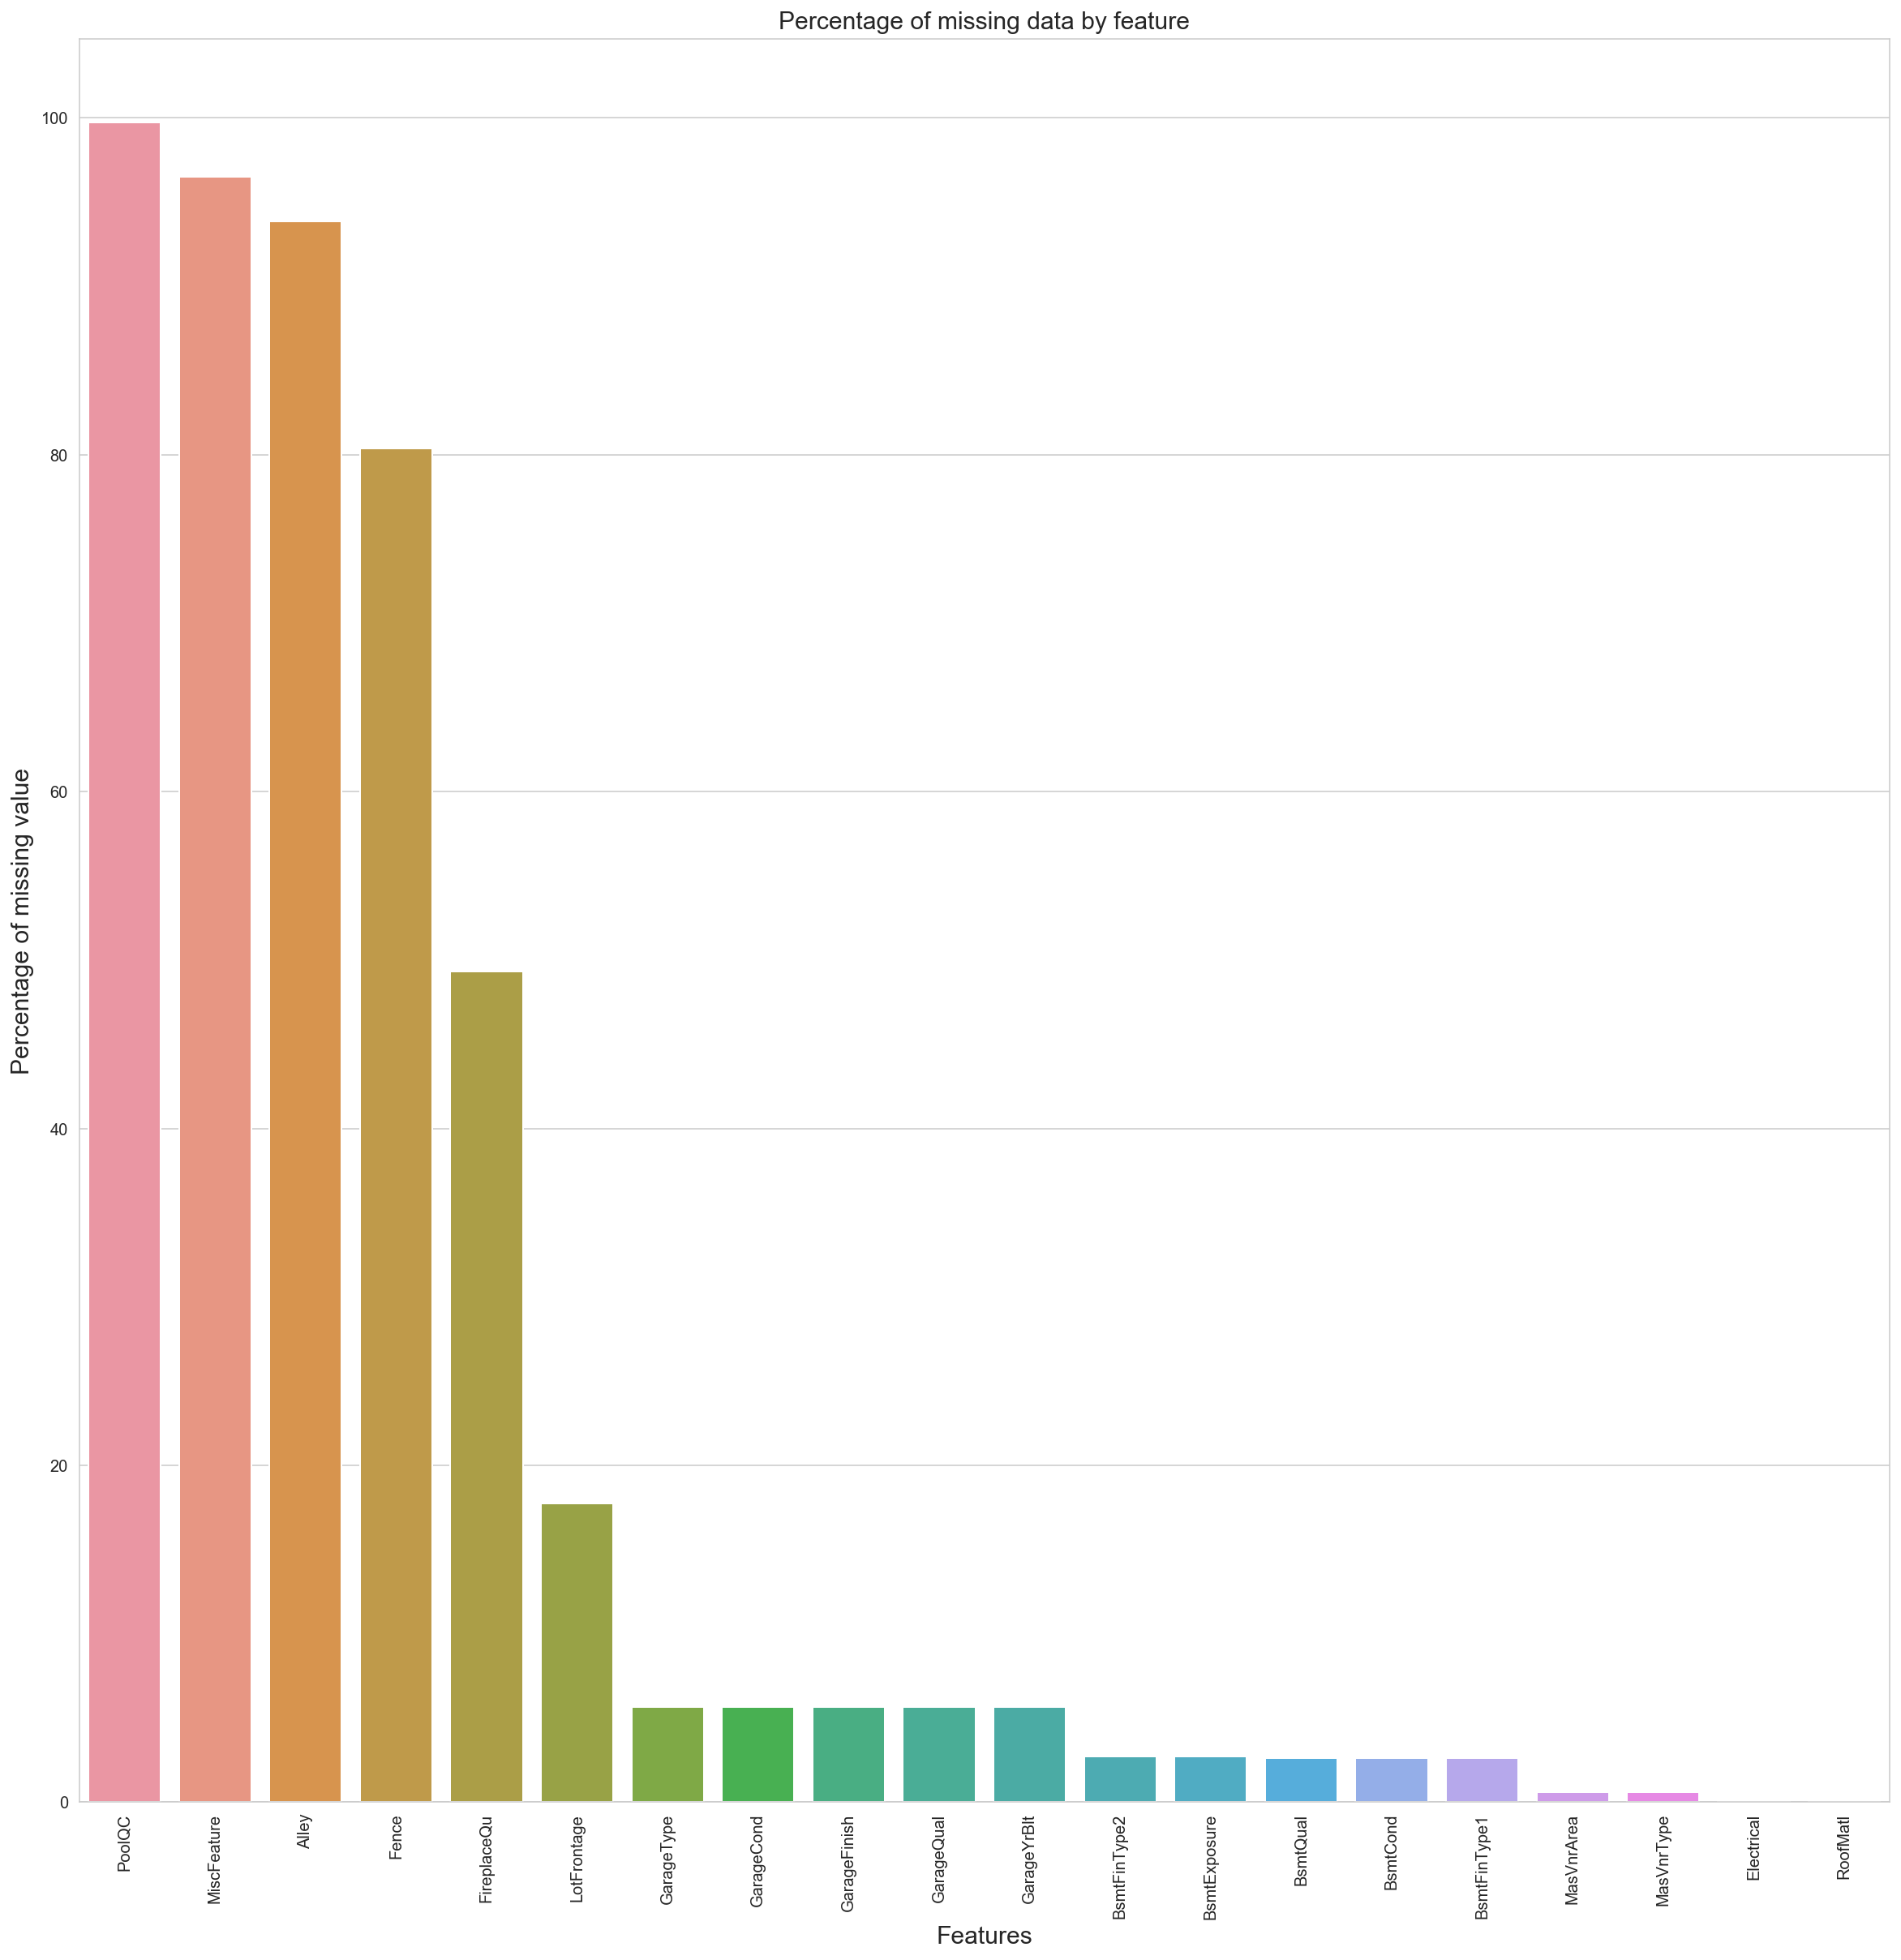

In [27]:
# plot the visualization graph for the missing value
f ,ax = plt.subplots(figsize=(20,20))
sns.barplot(x= Na_table.index, y= Na_percent)
ax.set_xticklabels(Na_table.index, rotation = 90)
ax.set_ylabel("Percentage of missing value", fontsize= 15)
ax.set_xlabel("Features",fontsize= 15)
ax.set_title("Percentage of missing data by feature", fontsize = 15)

According to the table above, 19 features have the missing values. I will have a look to the description to find out what the value should be to impute the data to each column. Firstly, the objective of the project is to buy the resident properly to find the cost effectiveness of the property. So, I will delete the properties which is non-resident properties.

In [28]:
#fill null values in Electrical's column with 'SBrkr' 
house['Electrical'].fillna(value= 'SBrkr', inplace= True)
#After having a look at the description of each feature, there are 2 categories 
#which should fill Null values with the numeric values: LotFrontage and  MasVnrArea
#the rest should fill with 'None' as there are no values.
#For example, PoolQc and Fence columns, fill none mean there are no pool or fence in the property

#fill null values in LotFrontage's column with 0.0 means Linear feet of street connected to property is 0.0
house['LotFrontage'].fillna(value= 0.0, inplace= True)

#fill null values in MasVnrArea's column with 0.0 means Masonry veneer area in square feet is 0.0
house['MasVnrArea'].fillna(value= 0.0, inplace= True)



# fill the rest of the value will 'None'
house.fillna(value= 'None',inplace=True)

#After cleaning the data, I decide to reset the index of the data to make it more properly
house.reset_index(inplace=True, drop=True)

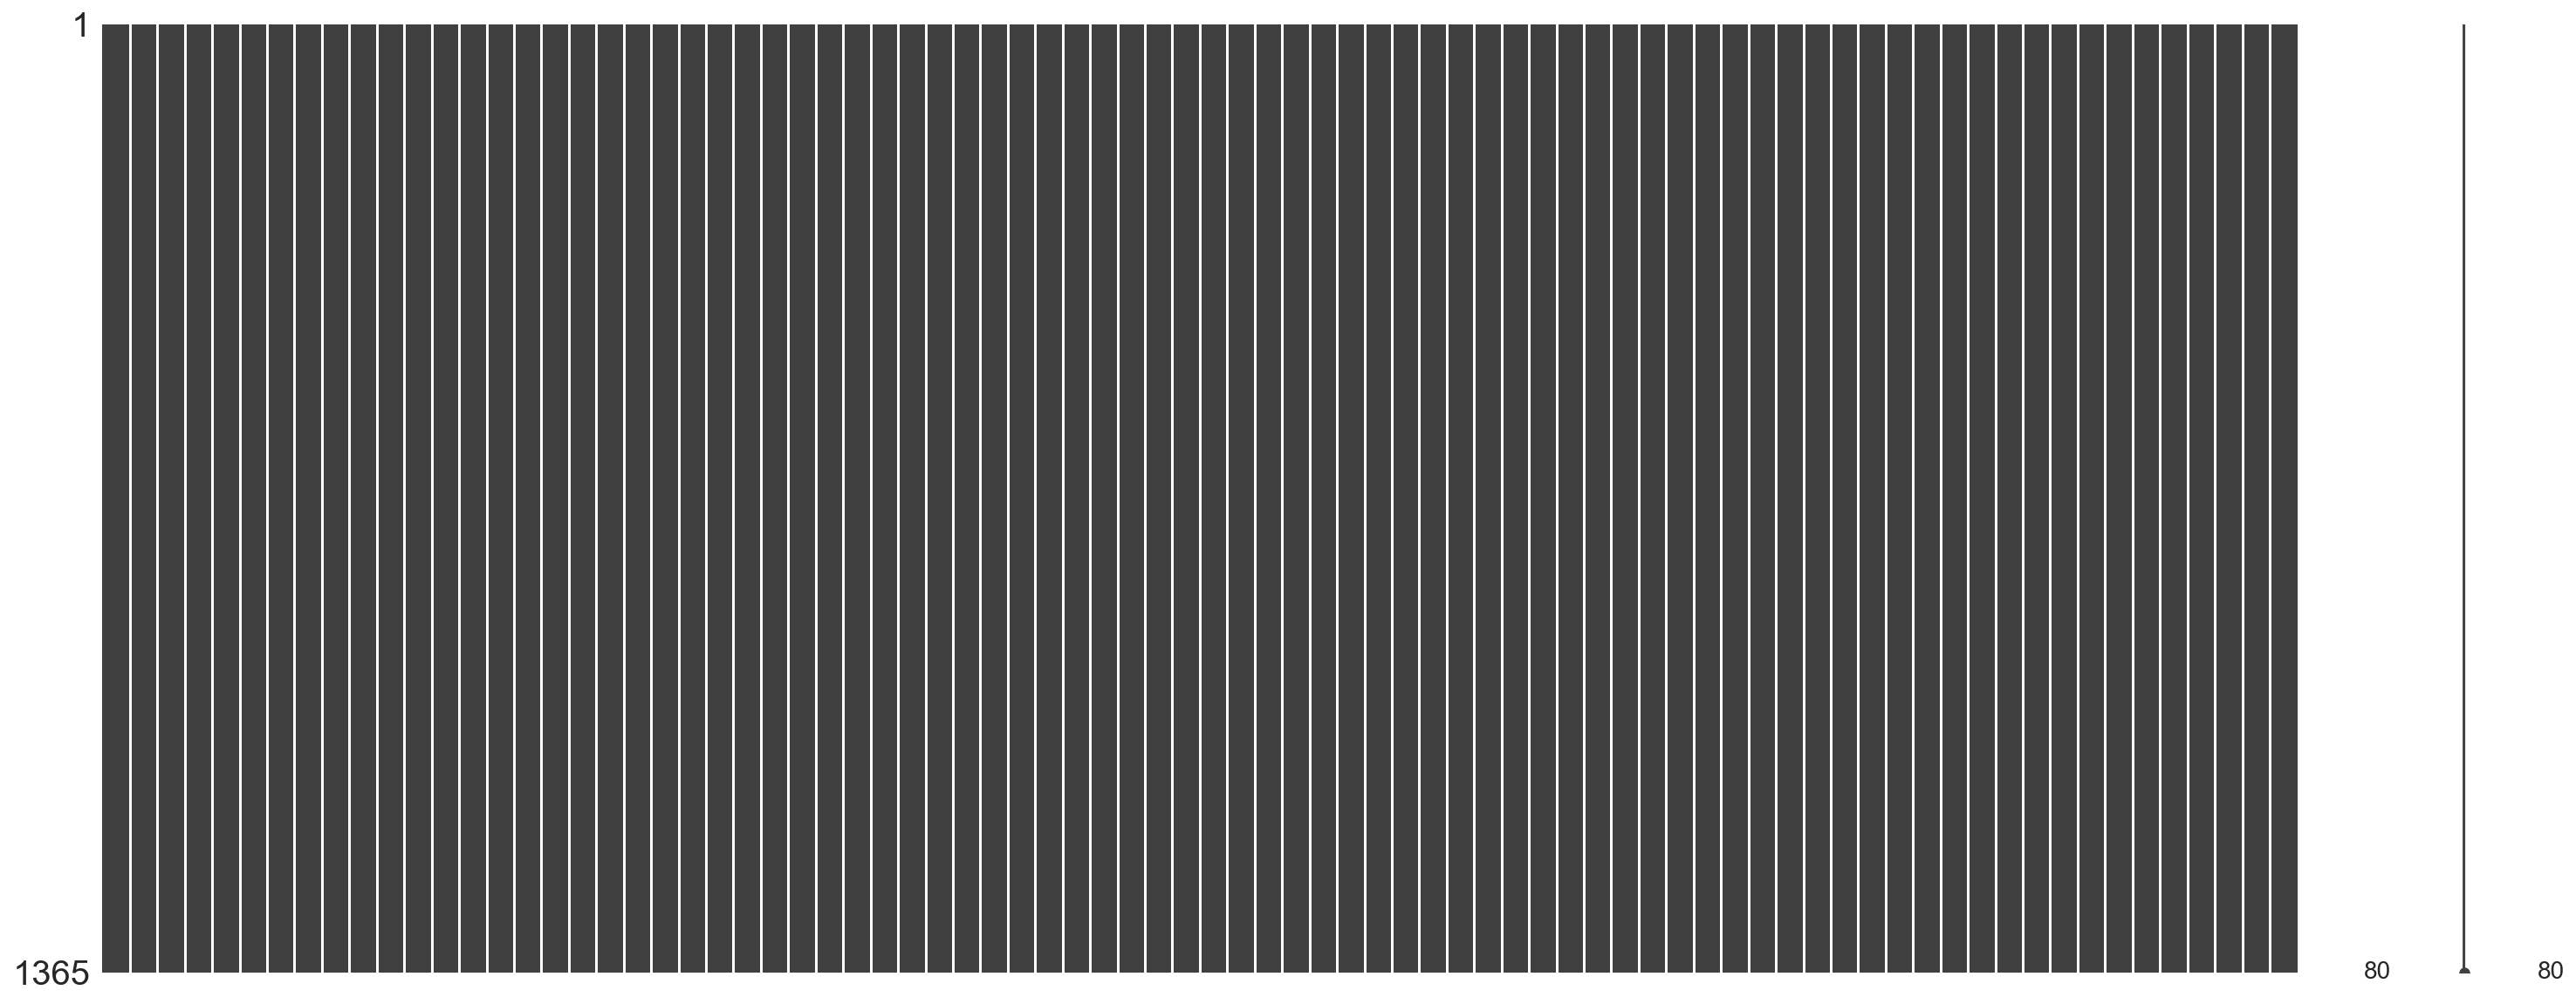

In [29]:
msno.matrix(house)# the graph below shows that all the columns is filled by the None which means there are no spcefic features in the house and the rest is filled by 0 which means there are no features in  these columns

# Feature Engineering

## Data Types

In [30]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 80 columns):
MSSubClass       1365 non-null int64
MSZoning         1365 non-null object
LotFrontage      1365 non-null float64
LotArea          1365 non-null int64
Street           1365 non-null object
Alley            1365 non-null object
LotShape         1365 non-null object
LandContour      1365 non-null object
Utilities        1365 non-null object
LotConfig        1365 non-null object
LandSlope        1365 non-null object
Neighborhood     1365 non-null object
Condition1       1365 non-null object
Condition2       1365 non-null object
BldgType         1365 non-null object
HouseStyle       1365 non-null object
OverallQual      1365 non-null int64
OverallCond      1365 non-null int64
YearBuilt        1365 non-null int64
YearRemodAdd     1365 non-null int64
RoofStyle        1365 non-null object
RoofMatl         1365 non-null object
Exterior1st      1365 non-null object
Exterior2nd      1365 no

In [31]:
house.loc[:, "MSSubClass"]= house.loc[:, "MSSubClass"].astype('str') # Covert MSSubClass column to categorical value
house.loc[:, 'YrSold']=house.loc[:, 'YrSold'].astype('str')
house.loc[:, 'MoSold']=house.loc[:, 'MoSold'].astype('str')
house.loc[:, 'YearBuilt']=house.loc[:, 'YearBuilt'].astype('str')
house.loc[:, 'YearRemodAdd']=house.loc[:, 'YearRemodAdd'].astype('str')

In [32]:
house.describe()

LotFrontage       LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1365.000000   1365.000000  1365.000000  1365.000000  1365.000000   
mean     56.863736   9760.826374     6.052015     5.567033    96.175824   
std      33.410675   4990.697015     1.332348     1.094212   168.343272   
min       0.000000   1300.000000     1.000000     1.000000     0.000000   
25%      41.000000   7420.000000     5.000000     5.000000     0.000000   
50%      63.000000   9317.000000     6.000000     5.000000     0.000000   
75%      78.000000  11316.000000     7.000000     6.000000   154.000000   
max     313.000000  70761.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1365.000000  1365.000000  1365.000000  1365.000000  1365.000000  ...   
mean    419.424176    46.761172   563.348718  1029.534066  1135.264469  ...   
std     412.709674   162.420294   438.899037   393.937618   351.677788  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   218.000000   791.000000   872.000000  ...   
50%     371.000000     0.000000   474.000000   975.000000  1068.000000  ...   
75%     690.000000     0.000000   808.000000  1252.000000  1349.000000  ...   
max    1880.000000  1474.000000  2336.000000  3206.000000  2898.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1365.000000  1365.000000  1365.000000   1365.00000    1365.000000   
mean      1.750183   466.958974    90.739927     44.09011      21.603663   
std       0.737462   208.075999   121.499317     61.76908      60.049250   
min       0.000000     0.000000     0.000000      0.00000       0.000000   
25%       1.000000   325.000000     0.000000      0.00000       0.000000   
50%       2.000000   474.000000     0.000000     24.00000       0.000000   
75%       2.000000   576.000000   168.000000     65.00000       0.000000   
max       4.000000  1390.000000   857.000000    523.00000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1365.000000  1365.000000  1365.000000   1365.000000    1365.000000  
mean      3.189011    13.948718     1.652015     36.842491  173510.126007  
std      28.566192    53.004706    30.627117    455.351441   65847.917737  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129000.000000  
50%       0.000000     0.000000     0.000000      0.000000  159434.000000  
75%       0.000000     0.000000     0.000000      0.000000  204750.000000  
max     508.000000   440.000000   648.000000  15500.000000  475000.000000  

[8 rows x 31 columns]

In [33]:
numeric_col= house.dtypes[house.dtypes != "object"].index
numeric_col=numeric_col[:-1]
numeric_col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [34]:
categorical_col = house.dtypes[house.dtypes == "object"].index
categorical_col

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
skewness= stats.skew(house[numeric_col])
skew_col='skewness'
skewness_df= pd.DataFrame(data= skewness, index=numeric_col)
skewness_df.rename(columns={0:'skewness'},inplace= True)
skewness_df= skewness_df.sort_values('skewness', ascending= False)
print(skewness_df)

                skewness
MiscVal        29.371966
PoolArea       18.658053
3SsnPorch      10.825771
LowQualFinSF    9.370985
KitchenAbvGr    4.433783
BsmtFinSF2      4.264066
ScreenPorch     4.193588
BsmtHalfBath    4.136603
LotArea         3.957627
EnclosedPorch   3.070101
MasVnrArea      2.719642
OpenPorchSF     2.114265
WoodDeckSF      1.553862
BsmtUnfSF       0.899271
1stFlrSF        0.840282
2ndFlrSF        0.783576
GrLivArea       0.727998
OverallCond     0.710424
BsmtFinSF1      0.698573
HalfBath        0.692142
Fireplaces      0.629472
BsmtFullBath    0.608146
TotRmsAbvGrd    0.540357
TotalBsmtSF     0.346715
OverallQual     0.206205
GarageArea      0.100334
BedroomAbvGr    0.049392
LotFrontage    -0.021426
FullBath       -0.030259
GarageCars     -0.379928


In [36]:
transform_feature = skewness_df.loc[abs(skewness_df['skewness'])>0.5]
transform_feature.index
skewed_features = transform_feature.index
house[skewed_features]=np.log1p(house[skewed_features])

In [37]:
skewness= stats.skew(house[numeric_col])
skew_col='skewness'
skewness_df= pd.DataFrame(data= skewness, index=numeric_col)
skewness_df.rename(columns={0:'skewness'},inplace= True)
skewness_df= skewness_df.sort_values('skewness', ascending= False)
print(skewness_df)

                skewness
PoolArea       18.397890
3SsnPorch       8.012154
LowQualFinSF    7.684680
MiscVal         5.287698
BsmtHalfBath    3.954654
KitchenAbvGr    3.796872
ScreenPorch     3.253307
BsmtFinSF2      2.525038
EnclosedPorch   2.118583
HalfBath        0.591777
MasVnrArea      0.514851
BsmtFullBath    0.454239
TotalBsmtSF     0.346715
2ndFlrSF        0.333090
Fireplaces      0.219151
OverallQual     0.206205
WoodDeckSF      0.181377
GarageArea      0.100334
BedroomAbvGr    0.049392
1stFlrSF        0.008662
OpenPorchSF     0.007643
LotFrontage    -0.021426
FullBath       -0.030259
GrLivArea      -0.144008
TotRmsAbvGrd   -0.155817
OverallCond    -0.228584
GarageCars     -0.379928
BsmtFinSF1     -0.586095
LotArea        -0.853662
BsmtUnfSF      -2.159405


In [38]:
fixed_features =['MSSubClass', 'MSZoning','LotFrontage', 'LotArea', 'Street', 
                 'Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig',
                 'LandSlope','Neighborhood','BldgType', 'HouseStyle','YearBuilt',
                 'YearRemodAdd', 'RoofStyle','MasVnrArea', 'Foundation','BsmtExposure',
                 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 
                 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Functional', 'Fireplaces','GarageType', 
                 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscFeature', 'MiscVal','MoSold',
                 'YrSold','SaleType']
renovatable_features = ['Condition1', 'Condition2','OverallQual', 'OverallCond','RoofMatl', 
                        'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond',
                        'BsmtQual', 'BsmtCond','BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC', 
                        'CentralAir', 'Electrical','KitchenQual','FireplaceQu','GarageQual', 'GarageCond', 
                        'PavedDrive','PoolQC','Fence','SaleCondition']

# Modeling

## Baseline


In [39]:
house.SalePrice.mean()

173510.126007326

In [40]:
fixed_df= house[fixed_features]
clean_fixed_df = pd.get_dummies(fixed_df, drop_first=True)
print(clean_fixed_df.shape)

y = house['SalePrice']
X = clean_fixed_df



(1365, 419)


In [41]:
ss=StandardScaler()
X= pd.DataFrame(ss.fit_transform(X), columns= X.columns)

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)


In [43]:
# p_value= f_regression(X,y)[1]
# p_value= p_value.round(3)
# p_value.values

In [44]:
# X.columns.values

In [45]:
# pd.DataFrame(p_value,index= X.columns)


## Linear Regression

In [46]:
def model_regression(model, X_train ,X_test,y_test,y_train):
    model.fit(X_train,y_train)
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    R2_train = "The R square of training set of this model is {:.4f}".format(model.score(X_train,y_train))
    MSE_train = "Mean square error of training set is {:.4f}".format(mean_squared_error(y_train,y_pred_train))
    R2_test = "The R square of testing set of this model is {:.4f}".format(model.score(X_test,y_test))
    MSE_test ="Mean square error of testing set is {:.4f}".format(mean_squared_error(y_test,y_pred_test))
    coef = pd.Series(model.coef_, index = X_train.columns)
    coef = coef.sort_values(ascending=False)
    top_feature = pd.DataFrame(pd.concat([coef.head(10),coef.tail(10)]),columns=['coef'])
    f ,ax = plt.subplots(figsize=(5,5))
    sns.barplot(y=top_feature.index,x=top_feature['coef'])
    plt.title('Top 20 Impactful features',fontdict={'fontsize': 18})
    return R2_train, MSE_train,R2_test,MSE_test







('The R square of training set of this model is 0.9367',
 'Mean square error of training set is 268696824.7128',
 'The R square of testing set of this model is -317203329503724845400064.0000',
 'Mean square error of testing set is 1435209779265247681994004210122752.0000')

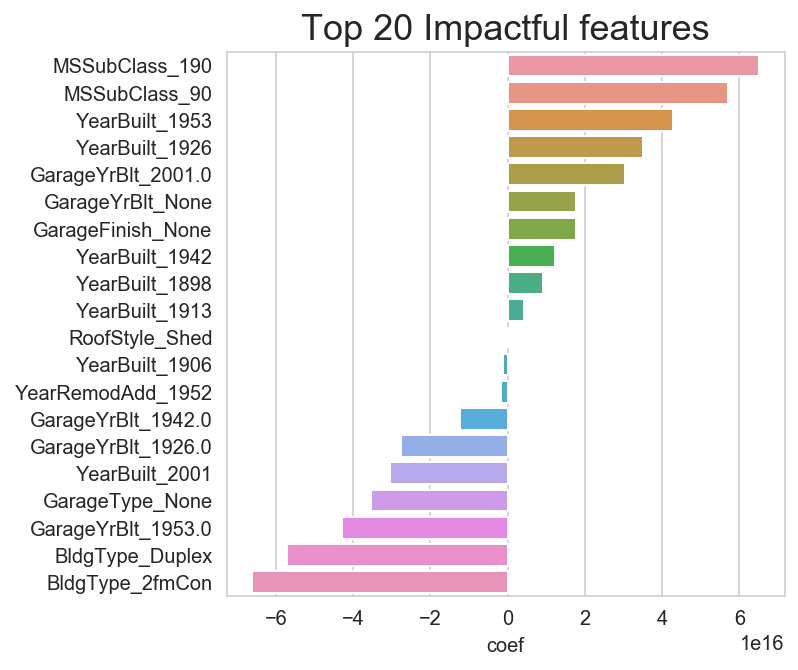

In [47]:
lr= LinearRegression()
model_regression(lr,X_train ,X_test,y_test,y_train)

('The R square of training set of this model is 0.9067',
 'Mean square error of training set is 396420043.1985',
 'The R square of testing set of this model is 0.8753',
 'Mean square error of testing set is 564389881.9175')

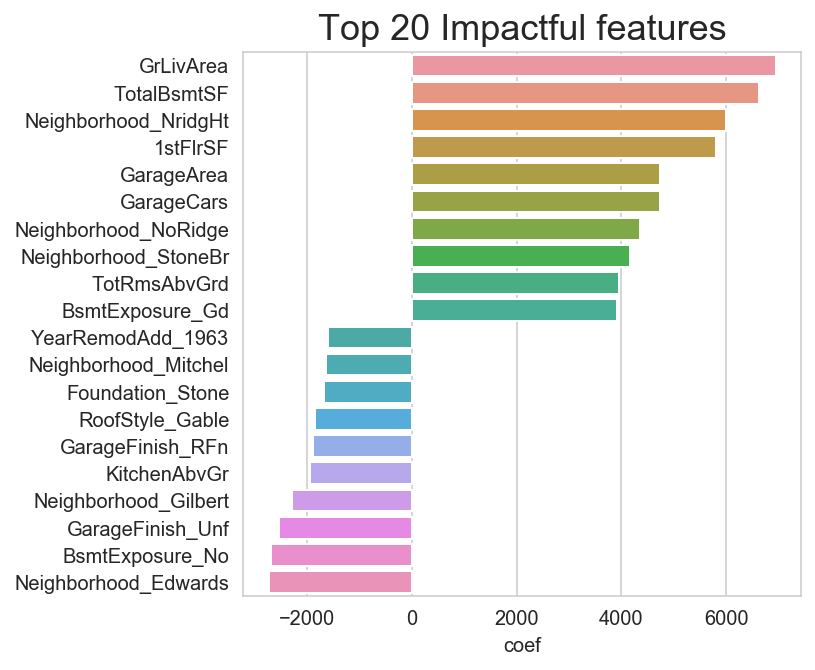

In [48]:
alphas = np.logspace(0, 5, 200)
ridge = RidgeCV(alphas=alphas, cv=10)
model_regression(ridge,X_train ,X_test,y_test,y_train)

('The R square of training set of this model is 0.8822',
 'Mean square error of training set is 500172309.2822',
 'The R square of testing set of this model is 0.8733',
 'Mean square error of testing set is 573293507.7346')

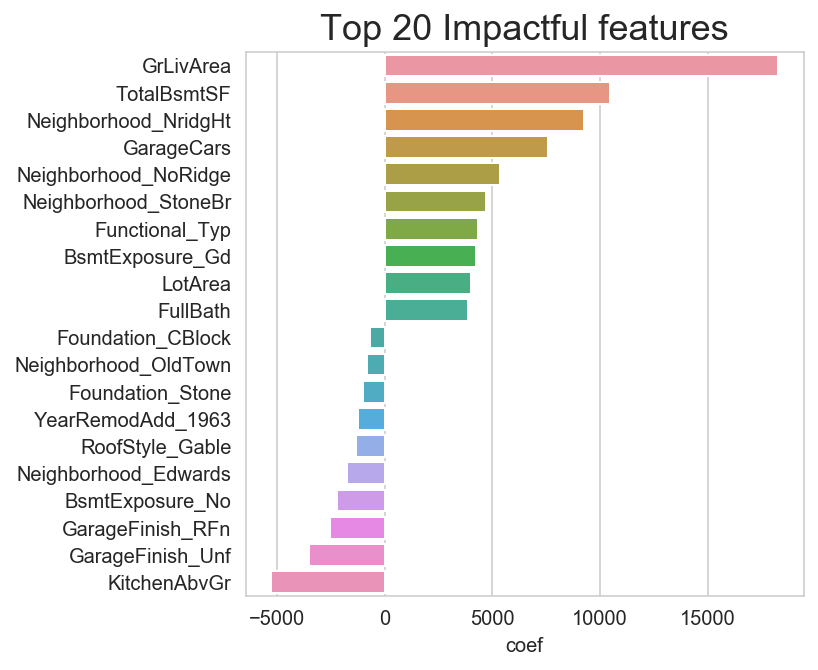

In [49]:
alphas = np.logspace(0, 5, 200)
lasso = LassoCV(alphas=alphas, cv=10,max_iter=100000)
model_regression(lasso,X_train ,X_test,y_test,y_train)

## Ridge

## Lasso

In [50]:
y_pred_lasso_test = lasso.predict(X_test)
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lr_test= lr.predict(X_test)
y_pred_lasso_train= lasso.predict(X_train)
y_pred_ridge_train= ridge.predict(X_train)
y_pred_lr_train= lr.predict(X_train)
y_pred_lasso = lasso.predict(X)
y_pred_ridge = ridge.predict(X)
y_pred_lasso = lasso.predict(X)
y_pred_ridge = ridge.predict(X)
y_pred_lr = lr.predict(X)

In [51]:
result_test= pd.DataFrame(data= y_test)
result_test['PredictLasso_test']=y_pred_lasso_test
result_test['PredictRidge_test']=y_pred_ridge_test
result_test['PredictLinear_test']=y_pred_lr_test
result_test['ResidualLasso_test']= y_test -y_pred_lasso_test
result_test['ResidualRidge_test']= y_test -y_pred_ridge_test
result_test['ResidualLinear_test']= y_test -y_pred_lr_test
result_train= pd.DataFrame(data= y_train)
result_train['PredictLasso_train']=y_pred_lasso_train
result_train['PredictRidge_train']=y_pred_ridge_train
result_train['PredictLinear_train']=y_pred_lr_train
result_train['ResidualLasso_train']=y_train -y_pred_lasso_train
result_train['ResidualRidge_train']= y_train -y_pred_ridge_train
result_train['ResidualLinear_train']= y_train -y_pred_lr_train
result= pd.DataFrame(data= y)
result['PredictLasso']=y_pred_lasso
result['PredictRidge']=y_pred_ridge
result['PredictLinear']=y_pred_lr
result['ResidualLasso']= y -y_pred_lasso
result['ResidualRidge']= y -y_pred_ridge
result['ResidualLinear']= y -y_pred_lr

In [52]:
result

SalePrice   PredictLasso   PredictRidge  PredictLinear  ResidualLasso  \
0        208500  194329.078811  203357.605435      200352.75   14170.921189   
1        181500  197843.679389  193849.365549      190304.25  -16343.679389   
2        223500  226355.865674  239598.664607      228288.00   -2855.865674   
3        140000  176841.054170  167053.743388      165502.50  -36841.054170   
4        250000  282596.101630  279537.776031      278980.25  -32596.101630   
...         ...            ...            ...            ...            ...   
1360     185000  183843.875543  196896.321089      203664.50    1156.124457   
1361     175000  181946.183267  181213.533055      175932.50   -6946.183267   
1362     210000  199238.721441  196198.744215      179310.00   10761.278559   
1363     142125  140156.728082  150251.380715      165152.25    1968.271918   
1364     147500  154431.392298  143024.729531      143640.50   -6931.392298   

      ResidualRidge  ResidualLinear  
0       5142.394565         8147.25  
1     -12349.365549        -8804.25  
2     -16098.664607        -4788.00  
3     -27053.743388       -25502.50  
4     -29537.776031       -28980.25  
...             ...             ...  
1360  -11896.321089       -18664.50  
1361   -6213.533055         -932.50  
1362   13801.255785        30690.00  
1363   -8126.380715       -23027.25  
1364    4475.270469         3859.50  

[1365 rows x 7 columns]

In [53]:
result_test

SalePrice  PredictLasso_test  PredictRidge_test  PredictLinear_test  \
1085     224000      208775.986716      230333.171115           271914.75   
931       91000      124675.702106      124510.458744           121290.25   
277      152000      149016.235732      143038.583395           152903.75   
900      160000      135175.214456      153081.222903           141548.75   
938      149900      128893.839807      131478.307522           128273.75   
...         ...                ...                ...                 ...   
799      174000      171632.354056      165150.894888           151965.75   
889      127500      171414.101549      148898.607134           160035.25   
721      162000      170340.658031      163344.300268           143902.75   
1068      80000      109664.616998      106469.708348           115813.75   
1357     287090      254687.565201      260055.850579           249093.75   

      ResidualLasso_test  ResidualRidge_test  ResidualLinear_test  
1085        15224.013284        -6333.171115            -47914.75  
931        -33675.702106       -33510.458744            -30290.25  
277          2983.764268         8961.416605              -903.75  
900         24824.785544         6918.777097             18451.25  
938         21006.160193        18421.692478             21626.25  
...                  ...                 ...                  ...  
799          2367.645944         8849.105112             22034.25  
889        -43914.101549       -21398.607134            -32535.25  
721         -8340.658031        -1344.300268             18097.25  
1068       -29664.616998       -26469.708348            -35813.75  
1357        32402.434799        27034.149421             37996.25  

[410 rows x 7 columns]

In [54]:
result_train

SalePrice  PredictLasso_train  PredictRidge_train  PredictLinear_train  \
438      250000       268686.503064       261332.793771            270466.75   
478      164900       147081.610038       156217.802209            164892.75   
398      135000       125636.940998       128600.442533            136850.75   
1234     156500       189573.479174       179452.835320            183508.75   
579      305000       284481.361113       298313.564379            305897.75   
...         ...                 ...                 ...                  ...   
1095     239000       218938.583693       233798.499070            238522.25   
1130     164000       169317.765161       165872.514938            156484.75   
1294     125500       119879.962147       128155.477888            134347.25   
860      207500       207780.587533       211148.745794            220469.25   
1126     200000       215479.910078       220926.672229            231031.75   

      ResidualLasso_train  ResidualRidge_train  ResidualLinear_train  
438         -18686.503064        -11332.793771             -20466.75  
478          17818.389962          8682.197791                  7.25  
398           9363.059002          6399.557467              -1850.75  
1234        -33073.479174        -22952.835320             -27008.75  
579          20518.638887          6686.435621               -897.75  
...                   ...                  ...                   ...  
1095         20061.416307          5201.500930                477.75  
1130         -5317.765161         -1872.514938               7515.25  
1294          5620.037853         -2655.477888              -8847.25  
860           -280.587533         -3648.745794             -12969.25  
1126        -15479.910078        -20926.672229             -31031.75  

[955 rows x 7 columns]

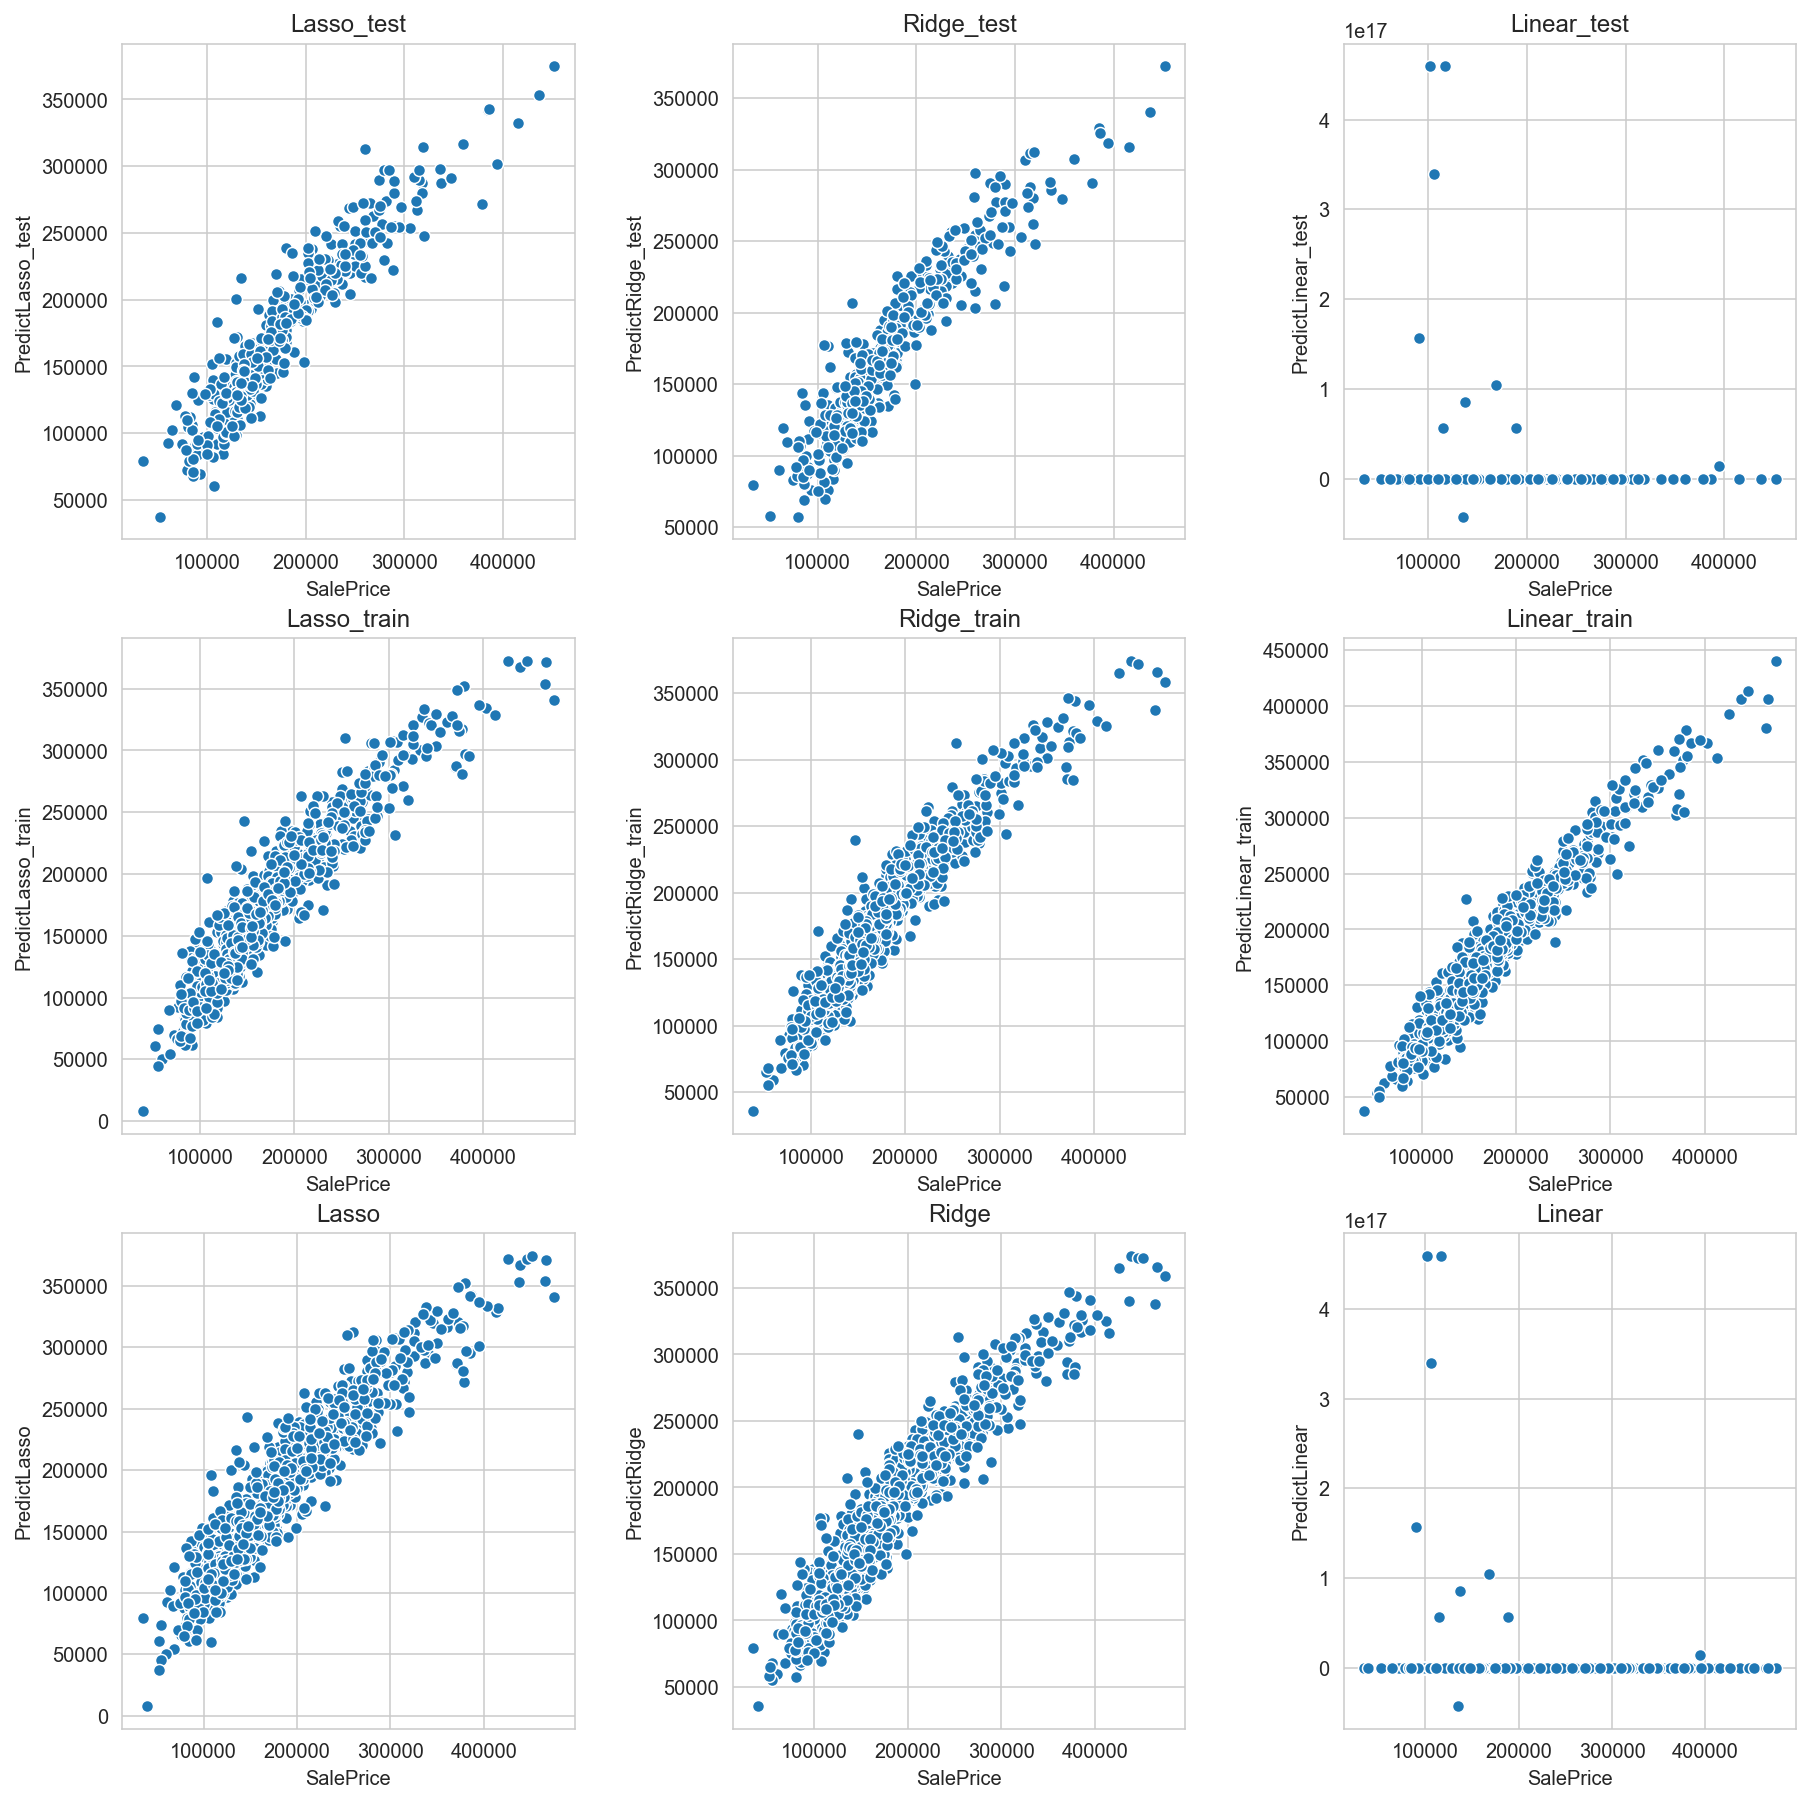

In [55]:
f ,ax = plt.subplots(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('Lasso_test')
sns.scatterplot(x=result_test['SalePrice'],y=result_test['PredictLasso_test'])
plt.subplot(3,3,2)
plt.title('Ridge_test')
sns.scatterplot(x=result_test['SalePrice'],y=result_test['PredictRidge_test'])
plt.subplot(3,3,3)
plt.title('Linear_test')
sns.scatterplot(x=result_test['SalePrice'],y=result_test['PredictLinear_test'])
plt.subplot(3,3,4)
plt.title('Lasso_train')
sns.scatterplot(x=result_train['SalePrice'],y=result_train['PredictLasso_train'])
plt.subplot(3,3,5)
plt.title('Ridge_train')
sns.scatterplot(x=result_train['SalePrice'],y=result_train['PredictRidge_train'])
plt.subplot(3,3,6)
plt.title('Linear_train')
sns.scatterplot(x=result_train['SalePrice'],y=result_train['PredictLinear_train'])
plt.subplot(3,3,7)
plt.title('Lasso')
sns.scatterplot(x=result['SalePrice'],y=result['PredictLasso'])
plt.subplot(3,3,8)
plt.title('Ridge')
sns.scatterplot(x=result['SalePrice'],y=result['PredictRidge'])
plt.subplot(3,3,9)
plt.title('Linear')
sns.scatterplot(x=result['SalePrice'],y=result['PredictLinear'])
plt.subplots_adjust(wspace=0.35, bottom=0.1,hspace=0.2)

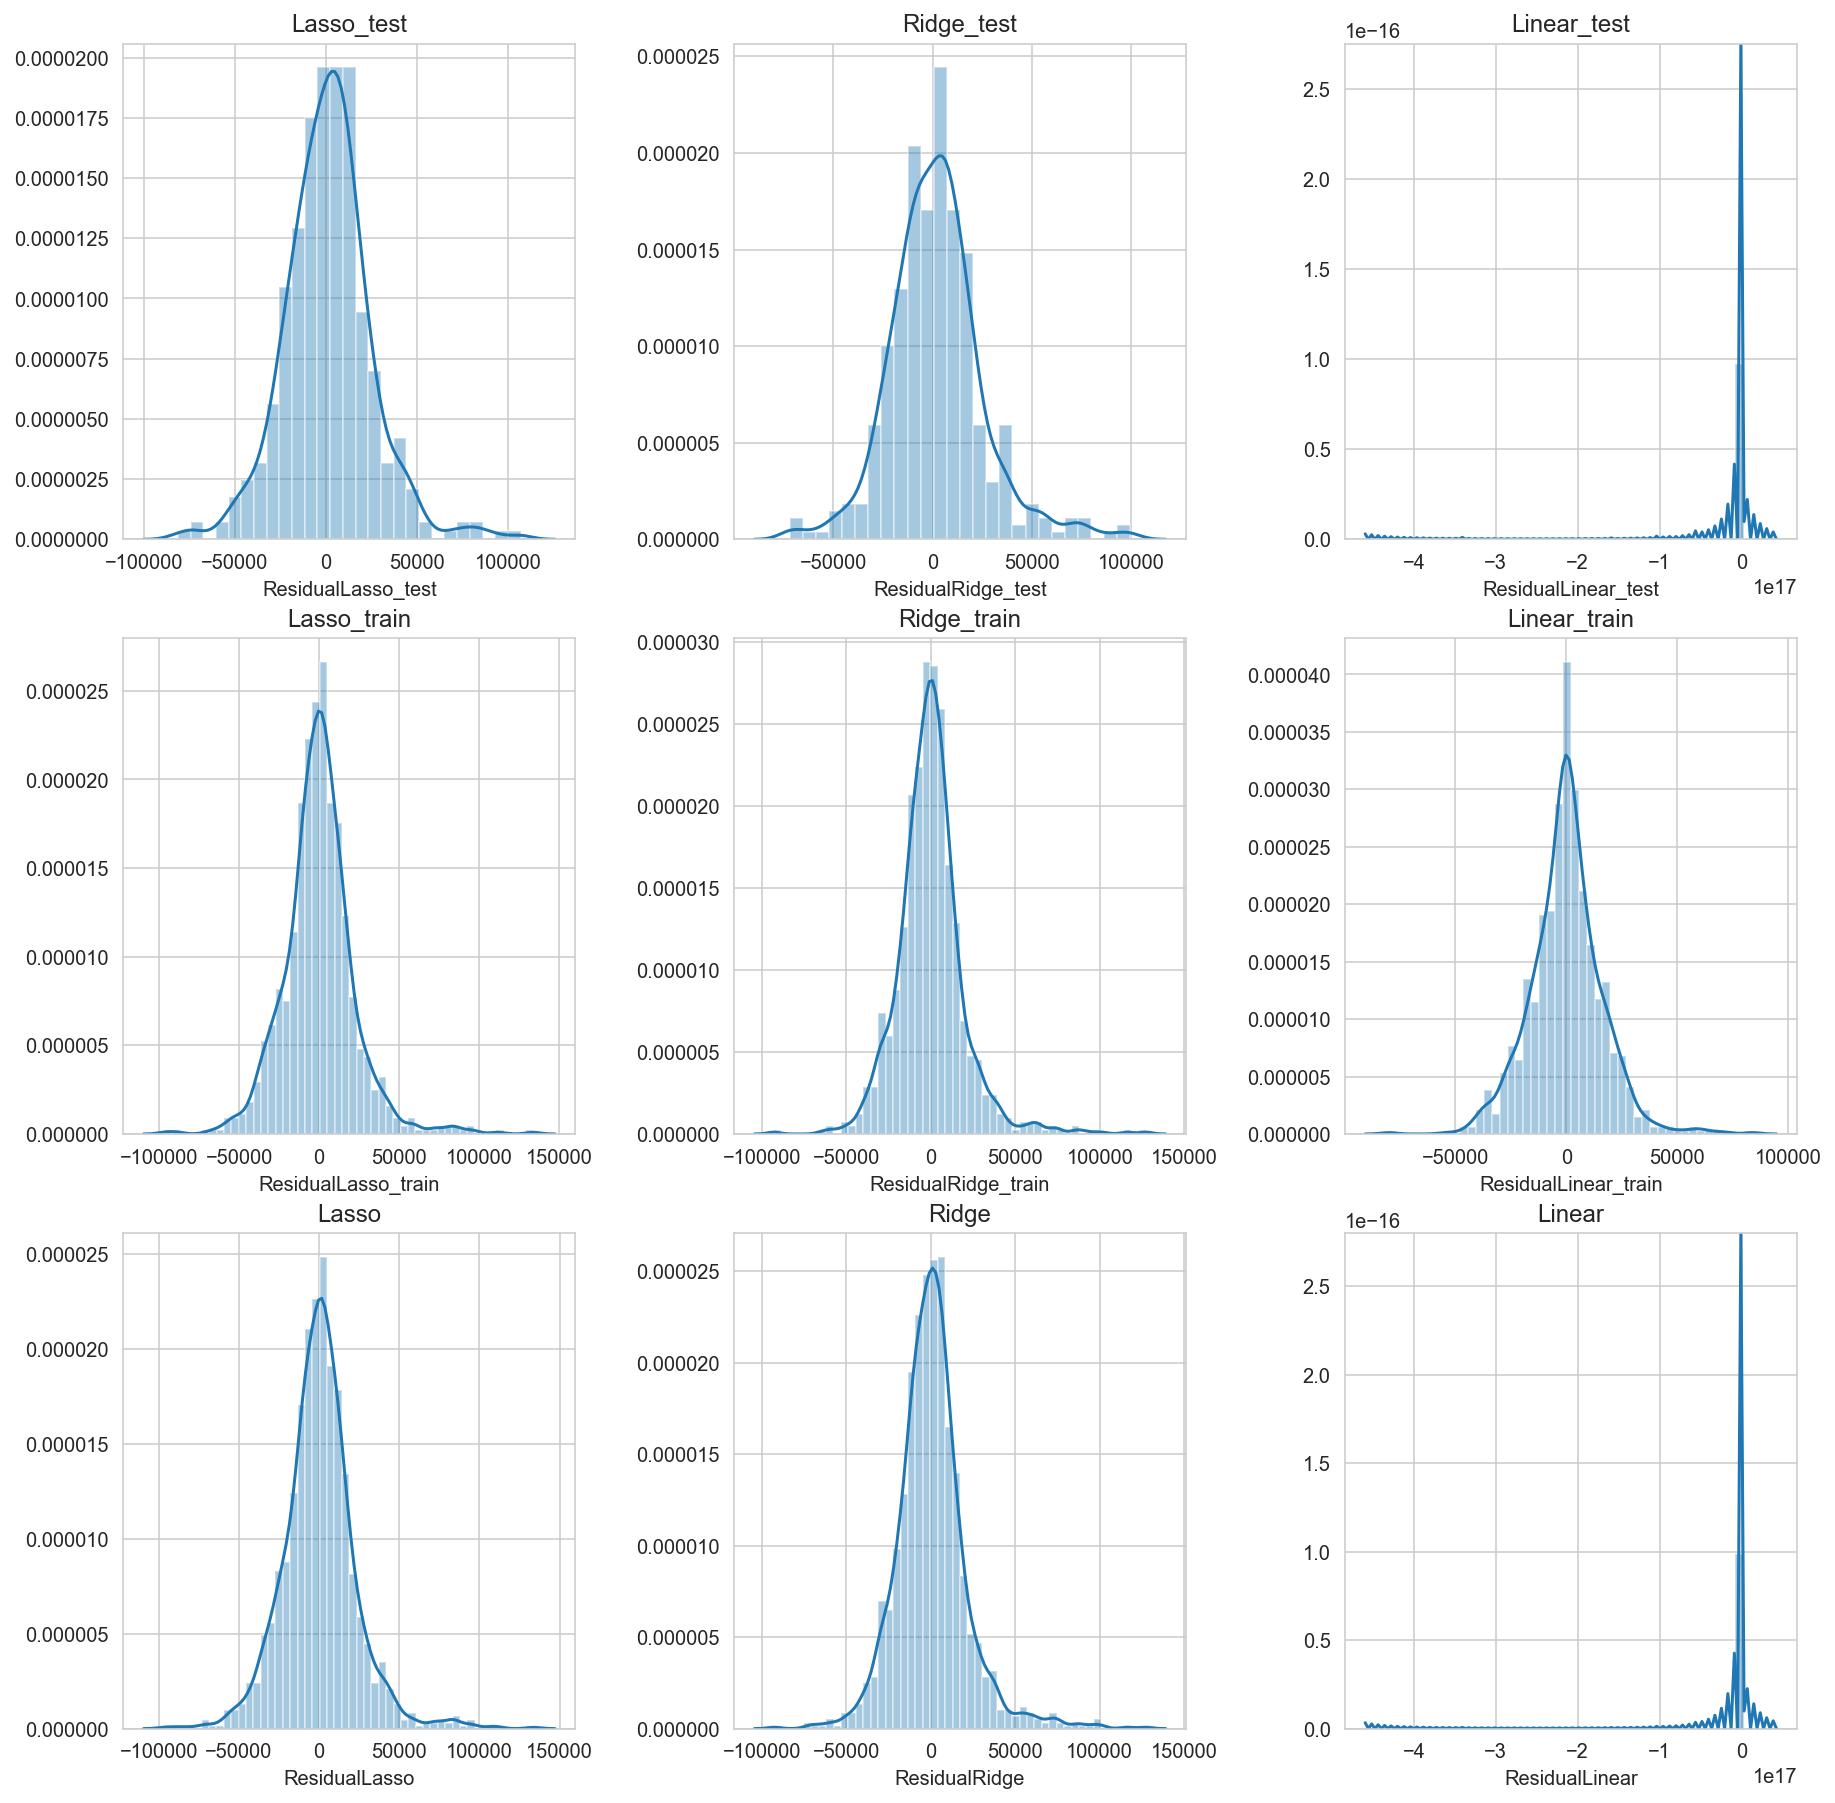

In [56]:
f ,ax = plt.subplots(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('Lasso_test')
sns.distplot(result_test['ResidualLasso_test'])
plt.subplot(3,3,2)
plt.title('Ridge_test')
sns.distplot(result_test['ResidualRidge_test'])
plt.subplot(3,3,3)
plt.title('Linear_test')
sns.distplot(result_test['ResidualLinear_test'])
plt.subplot(3,3,4)
plt.title('Lasso_train')
sns.distplot(result_train['ResidualLasso_train'])
plt.subplot(3,3,5)
plt.title('Ridge_train')
sns.distplot(result_train['ResidualRidge_train'])
plt.subplot(3,3,6)
plt.title('Linear_train')
sns.distplot(result_train['ResidualLinear_train'])
plt.subplot(3,3,7)
plt.title('Lasso')
sns.distplot(result['ResidualLasso'])
plt.subplot(3,3,8)
plt.title('Ridge')
sns.distplot(result['ResidualRidge'])
plt.subplot(3,3,9)
plt.title('Linear')
sns.distplot(result['ResidualLinear'])


plt.subplots_adjust(wspace=0.35, bottom=0.1,hspace=0.2)

# 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [57]:
renovatable_df= house[renovatable_features]
clean_renovatable_df = pd.get_dummies(renovatable_df, drop_first=True)
print(clean_fixed_df.shape)

y_ridge =result.ResidualRidge
y_lasso = result.ResidualLasso
X = clean_renovatable_df

(1365, 419)


In [58]:
ok= pd.concat([X,y_ridge,y_lasso], axis=1)
ok

OverallQual  OverallCond  Condition1_Feedr  Condition1_Norm  \
0               7     1.791759                 0                1   
1               6     2.197225                 1                0   
2               7     1.791759                 0                1   
3               7     1.791759                 0                1   
4               8     1.791759                 0                1   
...           ...          ...               ...              ...   
1360            7     1.791759                 0                1   
1361            6     1.791759                 0                1   
1362            6     1.945910                 0                1   
1363            5     1.945910                 0                1   
1364            5     1.945910                 0                1   

      Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   
...               ...              ...              ...              ...   
1360                0                0                0                0   
1361                0                0                0                0   
1362                0                0                0                0   
1363                0                0                0                0   
1364                0                0                0                0   

      Condition1_RRNe  Condition1_RRNn  ...  Fence_MnPrv  Fence_MnWw  \
0                   0                0  ...            0           0   
1                   0                0  ...            0           0   
2                   0                0  ...            0           0   
3                   0                0  ...            0           0   
4                   0                0  ...            0           0   
...               ...              ...  ...          ...         ...   
1360                0                0  ...            0           0   
1361                0                0  ...            0           0   
1362                0                0  ...            1           0   
1363                0                0  ...            0           0   
1364                0                0  ...            0           0   

      Fence_None  SaleCondition_AdjLand  SaleCondition_Alloca  \
0              1                      0                     0   
1              1                      0                     0   
2              1                      0                     0   
3              1                      0                     0   
4              1                      0                     0   
...          ...                    ...                   ...   
1360           1                      0                     0   
1361           1                      0                     0   
1362           0                      0                     0   
1363           1                      0                     0   
1364           1                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                        0                     1                      0   
1                        0                     1                      0   
2                        0                     1                      0   
3                        0                     0                      0   
4                        0                     1                      0   
...                    ...                   ...                    ...   
1360                     0                     1                      0   
1361              

In [59]:
ss=StandardScaler()
X= pd.DataFrame(ss.fit_transform(X), columns= X.columns)

In [60]:
X_train, X_test, y_train, y_test= train_test_split(X,y_ridge,test_size=0.3, random_state=42)


('The R square of training set of this model is 0.3406',
 'Mean square error of training set is 261412824.3594',
 'The R square of testing set of this model is 0.3044',
 'Mean square error of testing set is 389961230.5204')

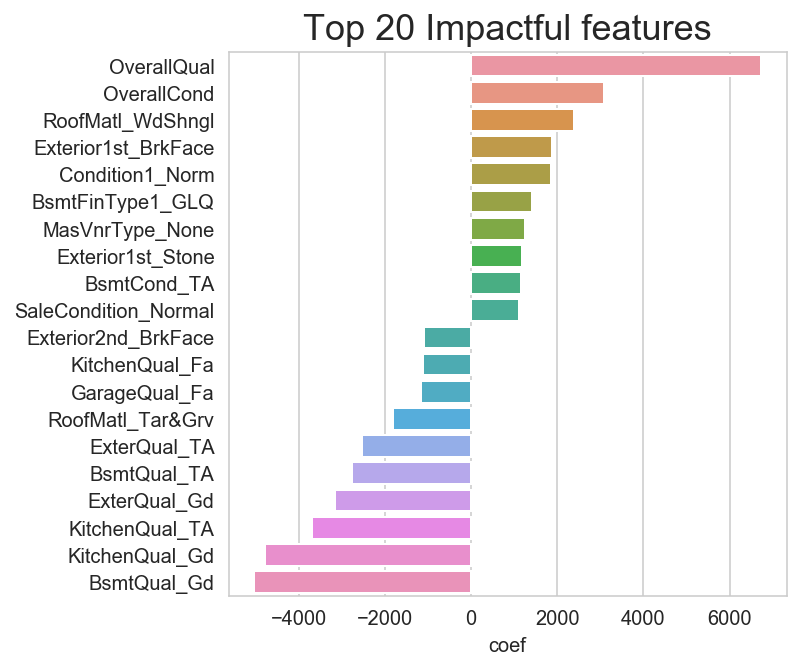

In [61]:
alphas = np.logspace(0, 5, 200)
ridge = RidgeCV(alphas=alphas, cv=10)
model_regression(ridge,X_train ,X_test,y_test,y_train)

In [62]:
X_train, X_test, y_train, y_test= train_test_split(X,y_lasso,test_size=0.3, random_state=42)

('The R square of training set of this model is 0.3692',
 'Mean square error of training set is 315526966.7852',
 'The R square of testing set of this model is 0.3360',
 'Mean square error of testing set is 379385627.8411')

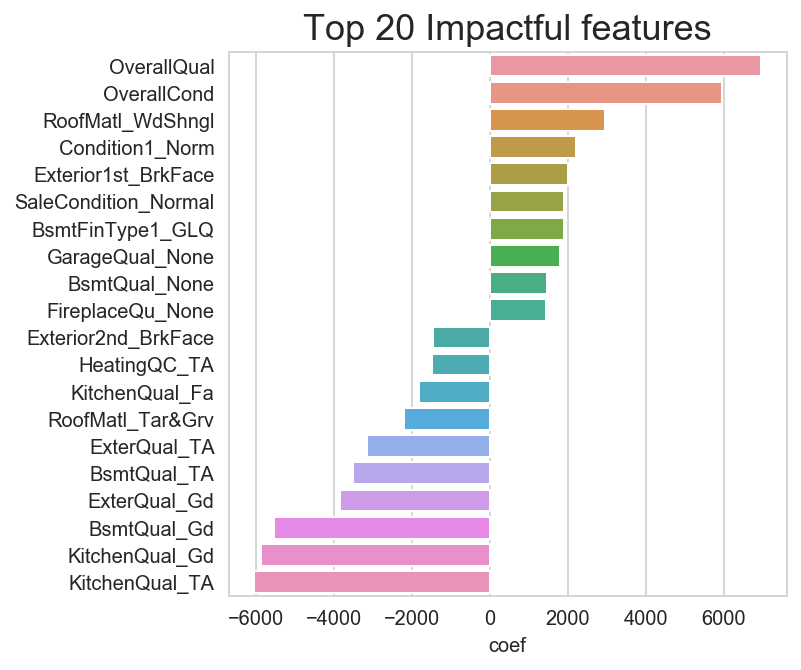

In [63]:
alphas = np.logspace(0, 5, 200)
lasso = LassoCV(alphas=alphas, cv=10,max_iter=100000)
model_regression(lasso,X_train ,X_test,y_test,y_train)